In [5]:
import joblib
import time
import mysql.connector
from datetime import date
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)


In [6]:

df = pd.read_csv('olx_data_With_Final_Cleaning.csv')
df


C:\Users\Commandor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


url  \
0      https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
1      https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...   
2      https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...   
3      https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
4      https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...   
...                                                  ...   
37704  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37705  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37706  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
37707  https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...   
37708  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   

                                                 title        date  \
0                   شقة للبيع بسكن مصر الاندلس مسلسل 1  2022-02-28   
1        سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥  2022-04-14   
2               لقطه سكن مصر التجمع التالت افر 150 الف  2022-04-28   
3      شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس  2022-04-26   
4                لسرعه البيع شقه سكن مصر التجمع التالت  2022-04-28   
...                                                ...         ...   
37704        شقة للبيع إمتداد مدينة 15 مايو مساحة 125م  2022-04-28   
37705               شقة للبيع بكمبوند دار مصر دور ثالث  2022-04-28   
37706                                        شقه للبيع  2022-02-28   
37707                                            للبيع  2022-02-28   
37708           شقة دور ارضي مرتفع سوبر لوكس مجاورة 15  2022-04-07   

                     location     compound       type   price  area bedrooms  \
0      New Cairo - El Tagamoa   Sakan Masr  Apartment  175000   115        3   
1      New Cairo - El Tagamoa   Sakan Masr  Apartment  180000   115        3   
2      New Cairo - El Tagamoa   Sakan Masr  Apartment  150000   115        3   
3                Gesr Al Suez  no_compound  Apartment  450000   135        3   
4      New Cairo - El Tagamoa   Sakan Masr  Apartment  160000   115        3   
...                       ...          ...        ...     ...   ...      ...   
37704             15 May City  no_compound  Apartment  550000   125        3   
37705             15 May City     Dar Misr  Apartment  600000   140        3   
37706             15 May City        Jewar  Apartment  470000    80        2   
37707             15 May City  no_compound  Apartment  470000   100        2   
37708             15 May City  no_compound  Apartment  440000   105        3   

        level  ... landline pets_allowed covered_parking private_garden pool  \
0           3  ...        1            1               1              1    0   
1           1  ...        0            0               0              0    0   
2           2  ...        0            0               0              0    0   
3           7  ...        0            0               0              0    0   
4           2  ...        0            0               0              0    0   
...       ...  ...      ...          ...             ...            ...  ...   
37704       2  ...        0            0               0              0    0   
37705       3  ...        0            0               0              0    0   
37706       5  ...        0            0               0              0    0   
37707       4  ...        1            1               0              1    0   
37708  Ground  ...        0            0               0              0    0   

      maids_room central_ac_heating built_in_kitchen_appliances  month  \
0              0                  0                           0      2   
1              0                  0                           0      4   
2              0                  0                           0      4   
3              0                  0                           0      4   
4              0                  0                           0      4   
...          ...                ...                         ...    ...   
37704          0                  0                

In [7]:
df['bedrooms'].value_counts()

3      12693
3      12523
2       7493
2       3861
4        681
1        331
5         77
6         29
10         5
10+        5
8          4
7          4
9          3
Name: bedrooms, dtype: int64

In [3]:
df['date']=pd.to_datetime(df['date'],format='%Y/%m/%d')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   url                          37709 non-null  object        
 1   title                        37709 non-null  object        
 2   date                         37709 non-null  datetime64[ns]
 3   location                     37709 non-null  object        
 4   compound                     37709 non-null  object        
 5   type                         37709 non-null  object        
 6   price                        37709 non-null  int64         
 7   area                         37709 non-null  int64         
 8   bedrooms                     37709 non-null  object        
 9   level                        37709 non-null  object        
 10  furnished                    37709 non-null  object        
 11  price_type                   37709 non-nu

here as we see we can see the down payment is negative so we should solve it as we see it's completly 

unreal data 1B and the price is 2M ? 

so we make it = 0 merans no payment

In [146]:
df[df['down_payment']<0]

url  \
1357   https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
5421   https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
21797  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
26124  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
26456  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
26658  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
27974  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
28283  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
29786  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
30887  https://www.olx.com.eg/en/ad/%D8%A8%D9%85%D9%8...   
33238  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
35676  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   

                                                   title       date  \
1357         شقة للبيع 204 متر البنفسج السعر 2 مليون 500 2022-01-28   
5421          شقة للبيع 190متر اللوتس الشمالية مليون 600 2022-02-28   
21797                                          شقه للبيع 2022-04-28   
26124  شقة للبيع الدور ٨ عمارة ١٢ دور تشطيب الترا سوب... 2022-03-31   
26456  شقه للبيع فرصه فى احمد عصمت بحرى على الشارع ال... 2022-02-28   
26658           شقه للبيع دور خامس 180م متشطبه سوبر لوكس 2022-03-31   
27974               شقة متشطبة تسليم فوري عمارات الأوقاف 2022-04-28   
28283                                     شقه بمدينه بدر 2022-02-28   
29786                                   شقه للبيع بحلوان 2022-02-28   
30887  بمقدم56ألف وقسط شهرى 7,500تقدر تمتلك شقة بأرقي... 2022-04-07   
33238  شقه للبيع العبد الجديد دور رابع جانب مدرسه الس... 2022-04-07   
35676                                          شقة للبيع 2022-02-28   

                     location          compound       type    price  area  \
1357   New Cairo - El Tagamoa              Sama  Apartment  2500000   204   
5421   New Cairo - El Tagamoa       no_compound  Apartment  1600000   190   
21797            Gesr Al Suez       no_compound  Apartment  1350000   160   
26124               Ain Shams       no_compound  Apartment   420000   130   
26456               Ain Shams             Jewar  Apartment   650000   145   
26658               Ain Shams  Arabella Village  Apartment   900000   180   
27974               Badr City             Pukka  Apartment   120000    70   
28283               Badr City             Jewar  Apartment   350000    97   
29786                  Helwan       no_compound  Apartment    50000   110   
30887          Mostakbal City          L’Avenir  Apartment  1124000   107   
33238           Sayeda Zeinab       no_compound  Apartment   210000    73   
35676                Matareya       no_compound  Apartment   280000    80   

      bedrooms level  ... landline pets_allowed covered_parking  \
1357         3     2  ...        1            0               1   
5421         3     4  ...        1            1               1   
21797        3     1  ...        0            0               0   
26124        3     8  ...        1            1               0   
26456        3     2  ...        0            1               0   
26658        2     5  ...        1            0               0   
27974        2     5  ...        0            0               1   
28283        3     5  ...        0            0               0   
29786        2     4  ...        1            0               0   
30887        2     2  ...        1            1               1   
33238        2     4  ...        0            0               0   
35676        2    10  ...        1            0               0   

      private_garden pool maids_room central_ac_heating  \
1357               0    0          0                  0   
5421               0    0          0                  0   
21797              0    0          0                  0   
26124              0    0          0                  0   
26456              0    0          0                  0   
26658              0    0          0                  0   
27974              0    0          0                  0   
28

### outliers handling

In [147]:
df['area'].max()

1000000

In [148]:
df['meterprice'].max()

970588

In [150]:
df['price'].max()

60000000

In [149]:
df['down_payment'].max()

1552229362

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   url                          37709 non-null  object        
 1   title                        37709 non-null  object        
 2   date                         37709 non-null  datetime64[ns]
 3   location                     37709 non-null  object        
 4   compound                     37709 non-null  object        
 5   type                         37709 non-null  object        
 6   price                        37709 non-null  int64         
 7   area                         37709 non-null  int64         
 8   bedrooms                     37709 non-null  object        
 9   level                        37709 non-null  object        
 10  furnished                    37709 non-null  object        
 11  price_type                   37709 non-nu

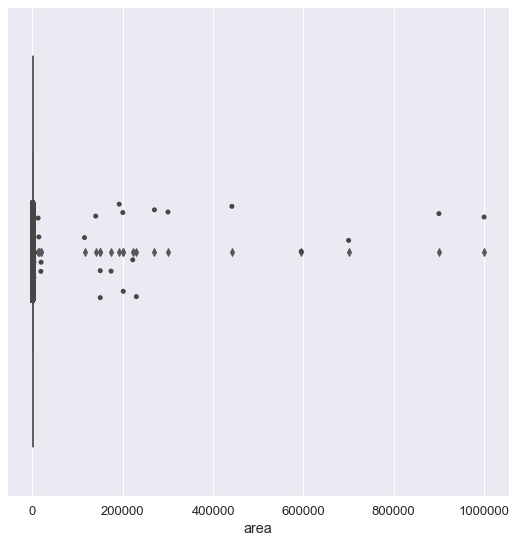

In [152]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

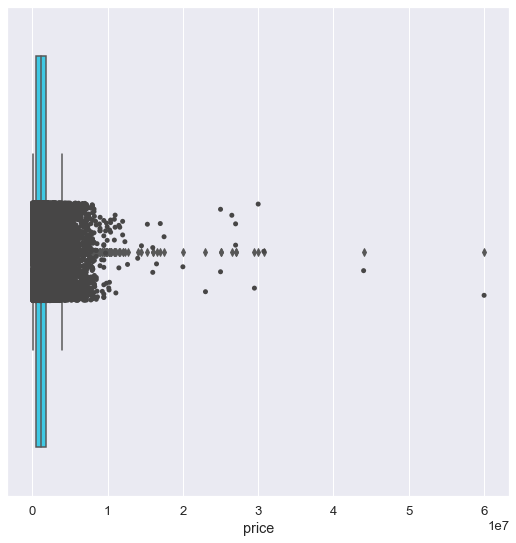

In [153]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

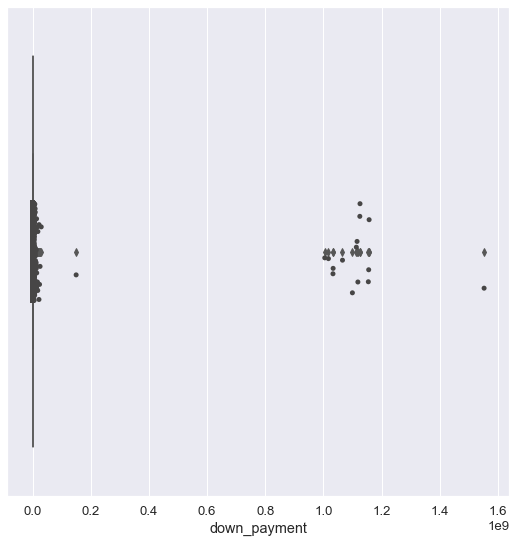

In [44]:
sns.boxplot(x='down_payment', data=df)
sns.stripplot(x='down_payment', data=df, color="#474646")

### droping outliers will drop 9000 row so we will replace with median

In [8]:
from datasist.structdata import detect_outliers
idx = ['area','price','meterprice','down_payment']
for col in idx:
    outliers_indices = detect_outliers(df, 0, [col])
    col_median = df[col].median()
    df[col].iloc[outliers_indices] = col_median

C:\Users\Commandor\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
df['area'].max()

268

In [47]:
df['meterprice'].max()

24219

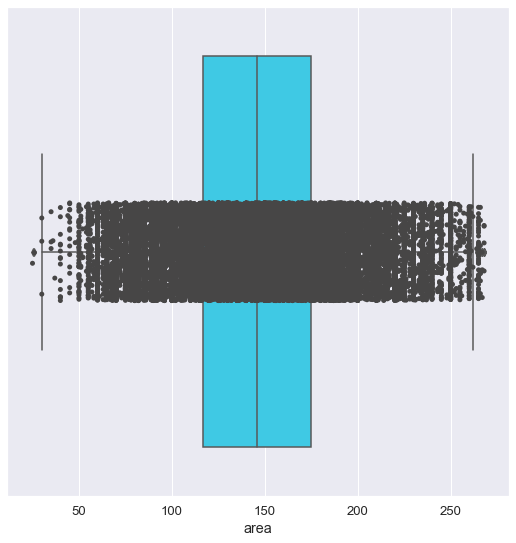

In [156]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

In [49]:
df['area'].max()

268

In [50]:
df['meterprice'].max()

24219

In [51]:
df['price'].max()

3888000

In [56]:
df['down_payment'].max()

250000

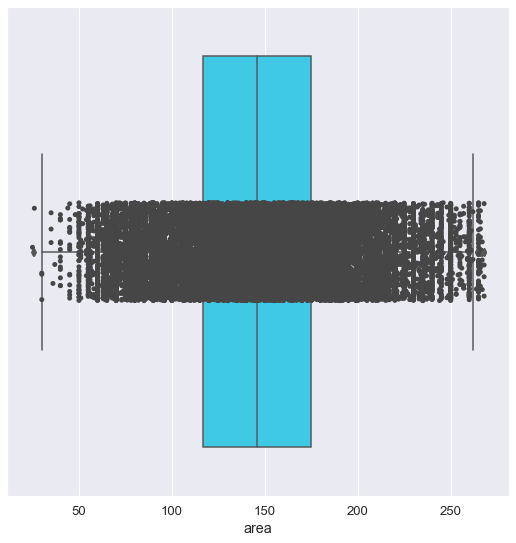

In [53]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

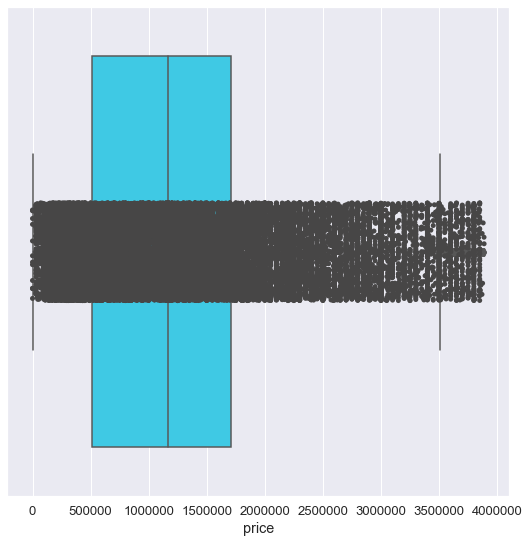

In [54]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

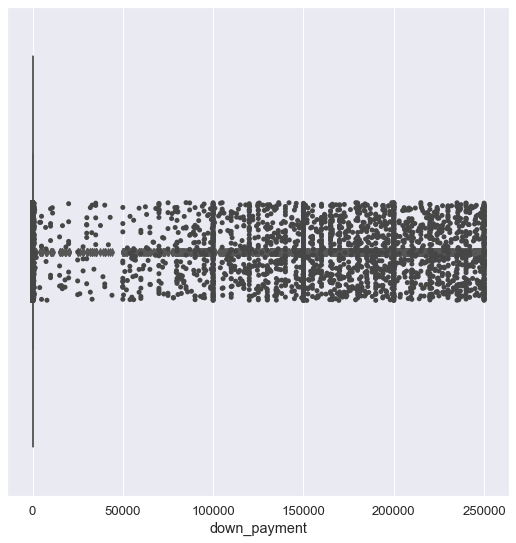

In [55]:
sns.boxplot(x='down_payment', data=df)
sns.stripplot(x='down_payment', data=df, color="#474646")

# Univariate Analaysis

location

New Cairo - El Tagamoa    12946
Madinaty                   3818
Badr City                  1682
Heliopolis                 1623
Gesr Al Suez               1560
Rehab City                 1250
Mokattam                   1224
Nasr City                  1174
Ain Shams                  1115
Zahraa Al Maadi            1084
Helwan                      847
Mostakbal City              749
New Capital City            705
Maadi                       677
Downtown Cairo              641
Helmeyat El Zaytoun         611
Shorouk City                578
Katameya                    496
Sheraton                    467
Shubra                      464
Salam City                  429
Hadayek al-Kobba            394
Marg                        373
Obour City                  364
New Nozha                   357
Hadayek Helwan              346
Matareya                    323
Dar al-Salaam               199
Ezbet El Nakhl              196
15 May City                 193
Zawya al-Hamra              15

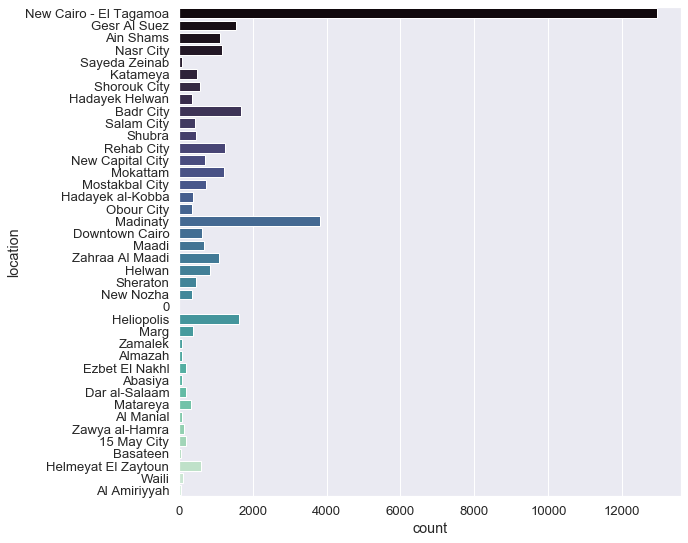

In [67]:
print('location')
print('')
print(df['location'].value_counts())
sns.countplot(y='location',data=df,palette='mako',)


In [58]:
print('compound')
print('')
print(df['compound'].value_counts()[:10])



compound

no_compound            16019
Jewar                   5064
Madinaty                2940
Sama                    1073
Beit Al Watan            633
L’Avenir                 544
Eastown                  484
Makany                   435
Mivida                   427
Mountain View iCity      424
Name: compound, dtype: int64


In [7]:
print('compound')
print('')
print(df['compound'].value_counts()[-20:])


compound

Sky Capital View             1
Sun Capital                  1
Cleopatra Palace             1
La Vista City                1
Bel Air - Sodic              1
TRUE Gate                    1
GCR Golf City                1
Anakaji                      1
Sueno                        1
Armonia                      1
Green Avenue                 1
Shorouk Gardens              1
Al Rabwa                     1
Sun City Gardens             1
Al Solaimaneyah Golf City    1
Go Heliopolis                1
Dreamland                    1
Creek Park                   1
Stella New Cairo             1
Etlalah                      1
Name: compound, dtype: int64


bedrooms
3      12693
3      12523
2       7493
2       3861
4        681
1        331
5         77
6         29
10         5
10+        5
8          4
7          4
9          3
Name: bedrooms, dtype: int64


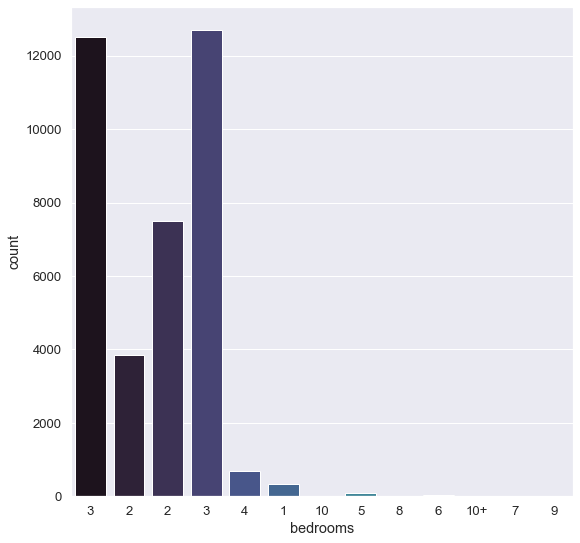

In [8]:
print('bedrooms')
print(df['bedrooms'].value_counts())
sns.countplot(x='bedrooms',data=df,palette='mako')


level
2          7954
3          6477
1          5956
Ground     4952
4          3688
5          2883
6          1410
7           859
10+         831
8           799
9           770
10          715
Highest     403
0            12
Name: level, dtype: int64


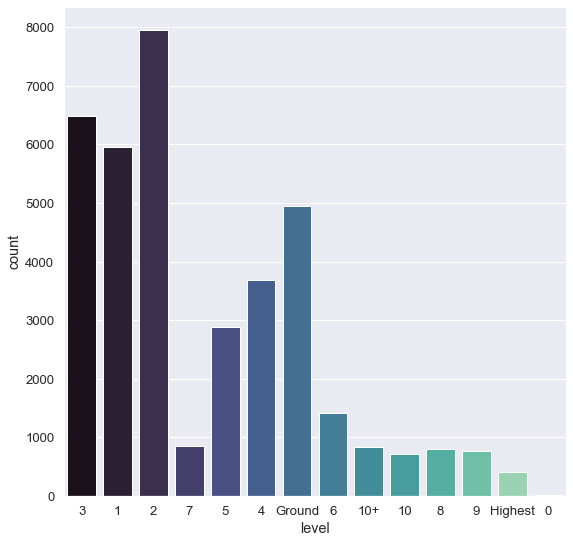

In [59]:
print('level')
print(df['level'].value_counts())
sns.countplot(x='level',data=df,palette='mako')


furnished
No     36229
Yes     1480
Name: furnished, dtype: int64


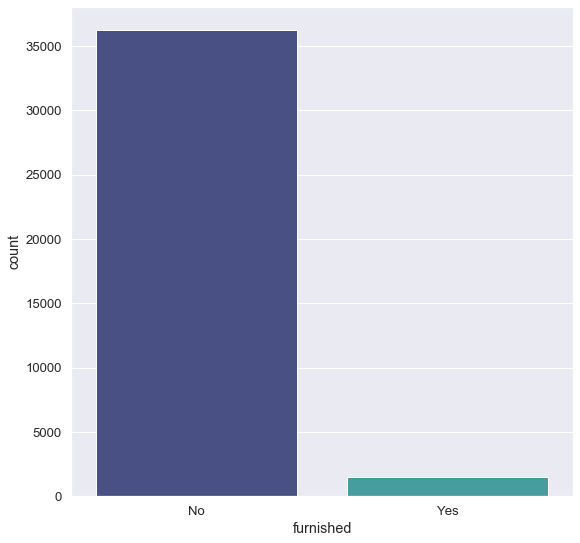

In [10]:
print('furnished')
print(df['furnished'].value_counts())
sns.countplot(x='furnished',data=df,palette='mako')


price_type
Not Negotiable    28640
Negotiable         9069
Name: price_type, dtype: int64


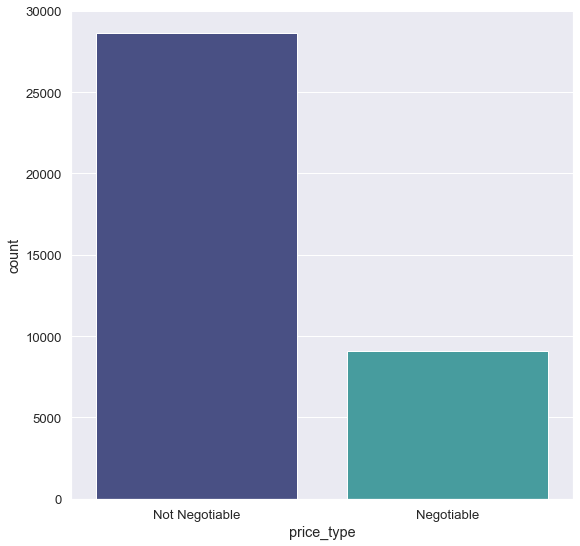

In [11]:
print('price_type')

print(df['price_type'].value_counts())
sns.countplot(x='price_type',data=df,palette='mako')


delivery_date
Ready to move      32350
soon                1473
2024                1368
2023                 932
2022                 544
2025                 484
within 6 months      468
2026                  86
2027                   2
2030                   1
2028                   1
Name: delivery_date, dtype: int64


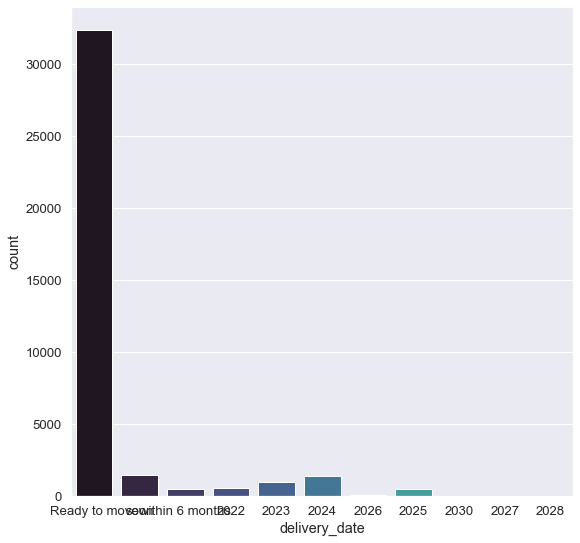

In [12]:
print('delivery_date')

print(df['delivery_date'].value_counts())
sns.countplot(x='delivery_date',data=df,palette='mako')


electricity_meter
1    21836
0    15873
Name: electricity_meter, dtype: int64


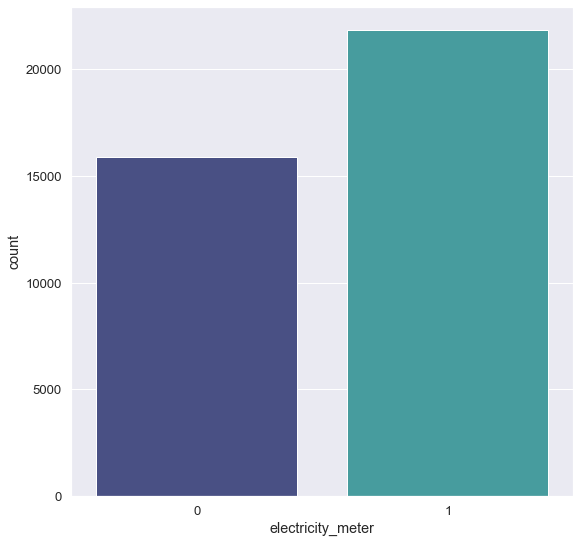

In [13]:
print('electricity_meter')

print(df['electricity_meter'].value_counts())
sns.countplot(x='electricity_meter',data=df,palette='mako')


balcony
1    21813
0    15896
Name: balcony, dtype: int64


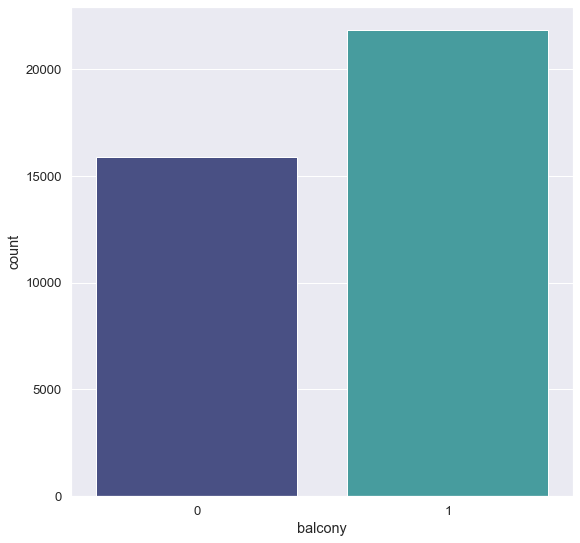

In [14]:
print('balcony')

print(df['balcony'].value_counts())
sns.countplot(x='balcony',data=df,palette='mako')


water_meter
1    19901
0    17808
Name: water_meter, dtype: int64


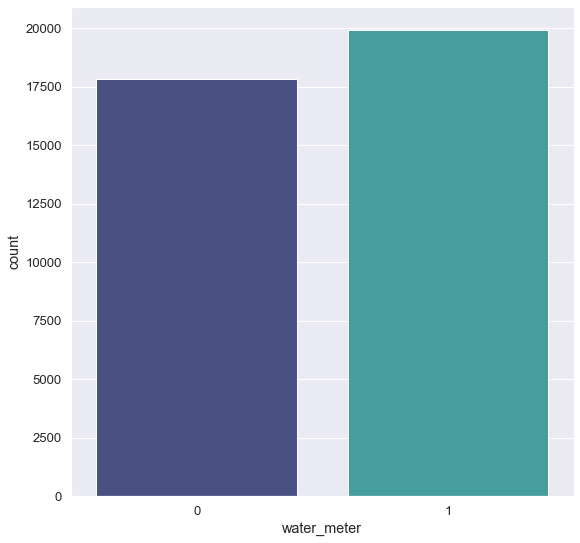

In [15]:
print('water_meter')

print(df['water_meter'].value_counts())
sns.countplot(x='water_meter',data=df,palette='mako')


elevator
0    19262
1    18447
Name: elevator, dtype: int64


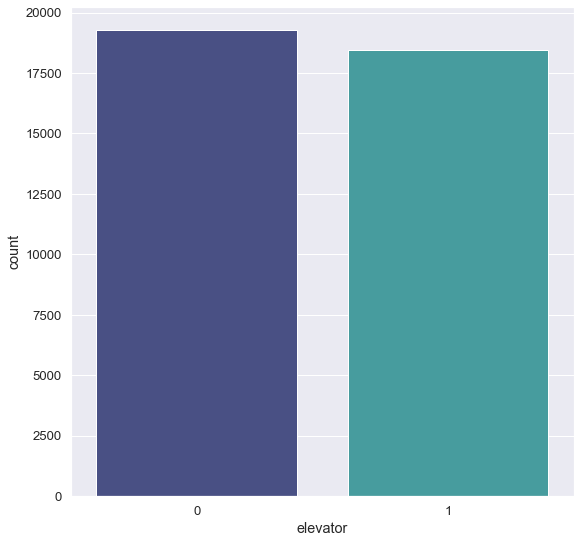

In [16]:
print('elevator')

print(df['elevator'].value_counts())
sns.countplot(x='elevator',data=df,palette='mako')


maids_room
0    19828
1    17881
Name: security, dtype: int64


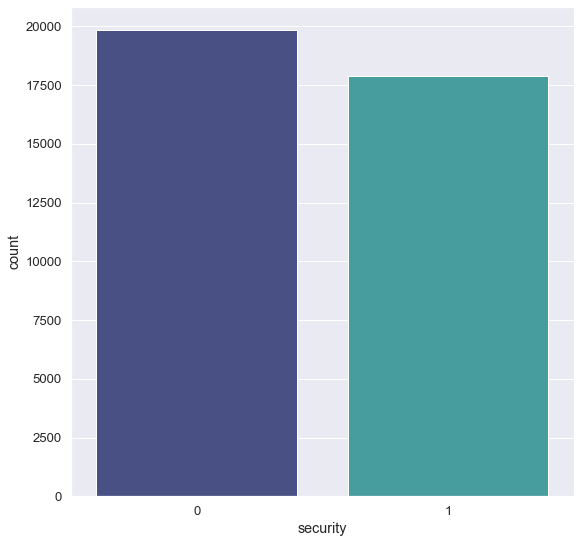

In [17]:
print('maids_room')

print(df['security'].value_counts())
sns.countplot(x='security',data=df,palette='mako')


landline
0    23769
1    13940
Name: landline, dtype: int64


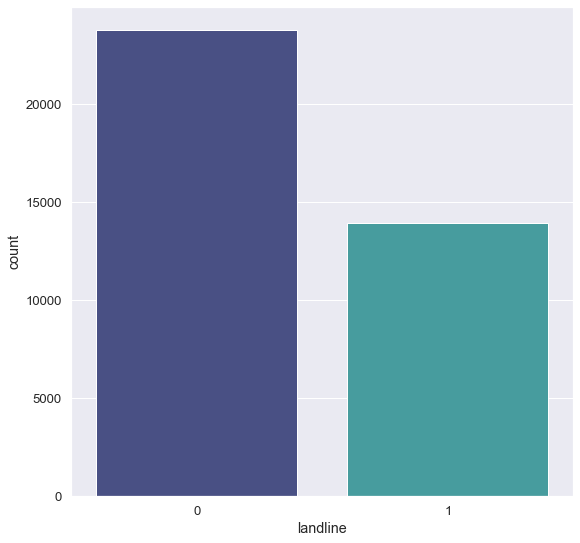

In [18]:
print('landline')

print(df['landline'].value_counts())
sns.countplot(x='landline',data=df,palette='mako')


pets_allowed
0    24727
1    12982
Name: pets_allowed, dtype: int64


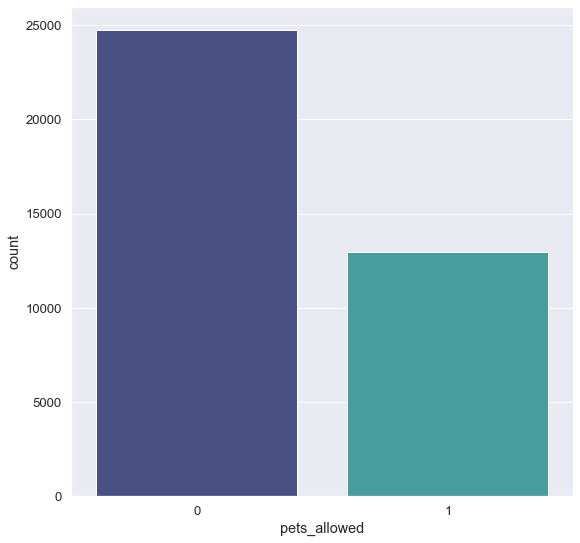

In [19]:
print('pets_allowed')

print(df['pets_allowed'].value_counts())
sns.countplot(x='pets_allowed',data=df,palette='mako')


covered_parking
0    24875
1    12834
Name: covered_parking, dtype: int64


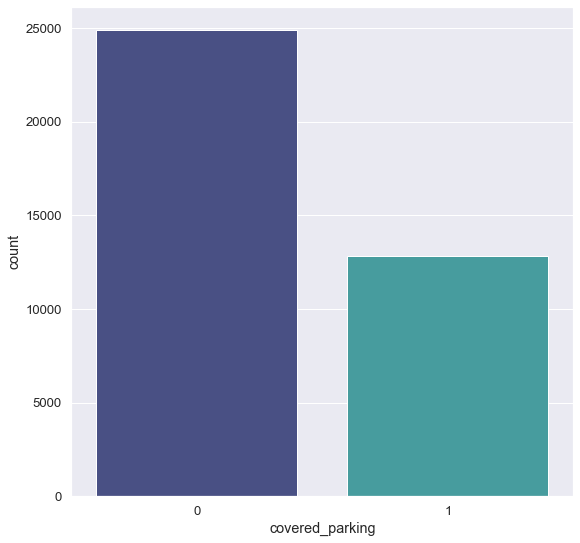

In [20]:
print('covered_parking')

print(df['covered_parking'].value_counts())
sns.countplot(x='covered_parking',data=df,palette='mako')


maids_room
0    29450
1     8259
Name: private_garden, dtype: int64


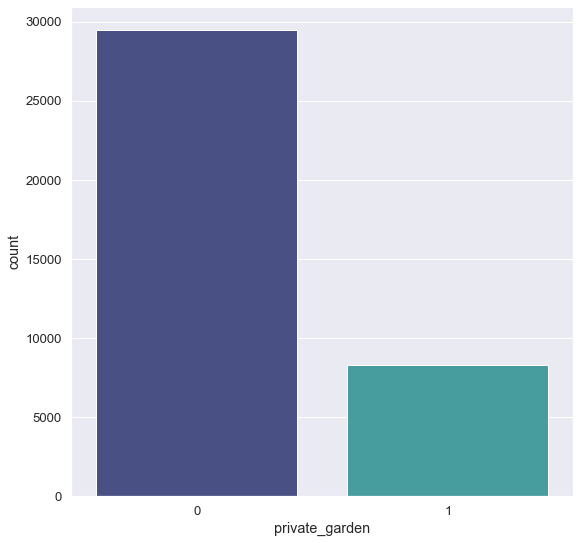

In [21]:
print('maids_room')

print(df['private_garden'].value_counts())
sns.countplot(x='private_garden',data=df,palette='mako')


pool
0    32777
1     4932
Name: pool, dtype: int64


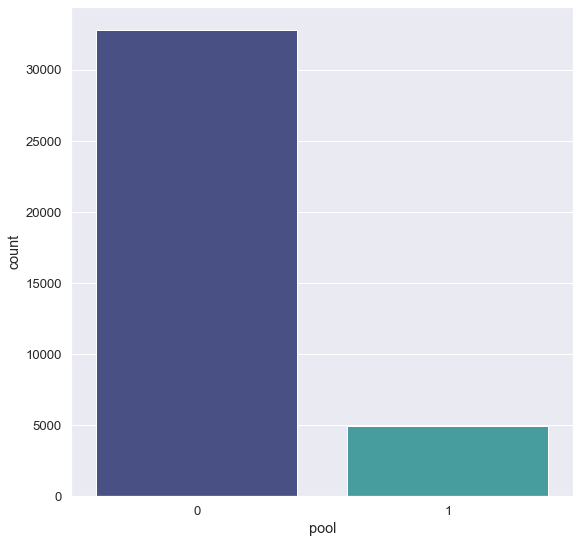

In [22]:
print('pool')

print(df['pool'].value_counts())
sns.countplot(x='pool',data=df,palette='mako')



maids_room
0    33661
1     4048
Name: maids_room, dtype: int64


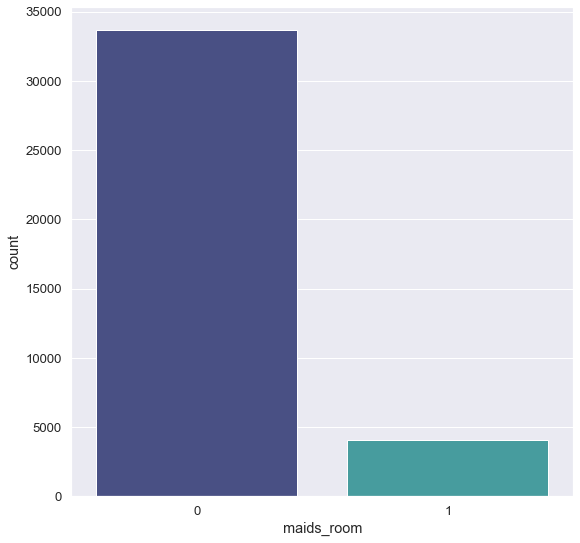

In [23]:
print('maids_room')
print(df['maids_room'].value_counts())
sns.countplot(x='maids_room',data=df,palette='mako')



central_ac_heating
0    33466
1     4243
Name: central_ac_heating, dtype: int64


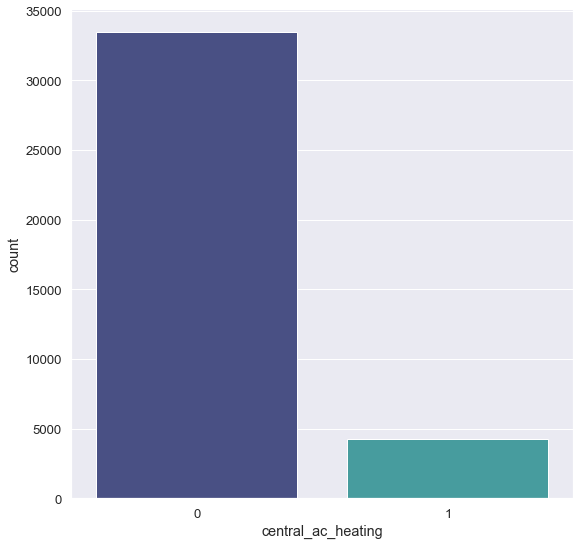

In [24]:
print('central_ac_heating')

print(df['central_ac_heating'].value_counts())
sns.countplot(x='central_ac_heating',data=df,palette='mako')



built_in_kitchen_appliances
0    33717
1     3992
Name: built_in_kitchen_appliances, dtype: int64


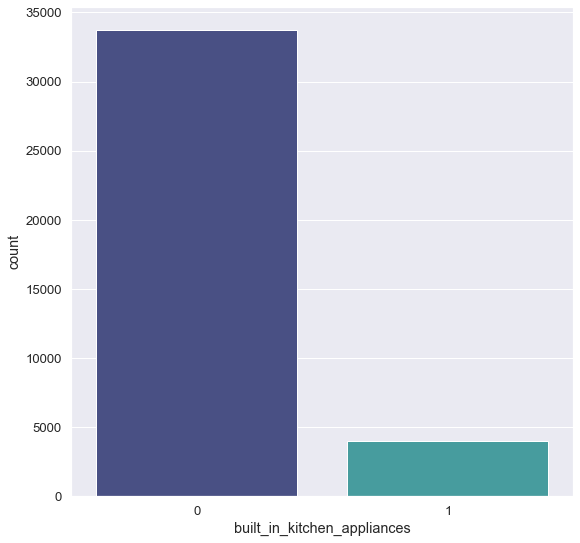

In [25]:
print('built_in_kitchen_appliances')
print(df['built_in_kitchen_appliances'].value_counts())
sns.countplot(x='built_in_kitchen_appliances',data=df,palette='mako')



# Bivariate Analaysis

In [160]:
df.corr()

price      area  down_payment  \
price                        1.000000  0.487292     -0.062471   
area                         0.487292  1.000000     -0.071550   
down_payment                -0.062471 -0.071550      1.000000   
electricity_meter            0.013588 -0.005273      0.051832   
balcony                      0.133018  0.122976      0.076701   
water_meter                  0.052853  0.017768      0.067735   
elevator                     0.131139  0.134691      0.092766   
security                     0.216388  0.141444      0.079379   
natural_gas                  0.026968 -0.013288      0.006255   
landline                     0.094865  0.045600      0.024069   
pets_allowed                 0.187994  0.139787      0.100368   
covered_parking              0.182635  0.177056      0.155588   
private_garden               0.183757  0.068582      0.039961   
pool                         0.170339  0.062484      0.094028   
maids_room                   0.163357  0.127428      0.040102   
central_ac_heating           0.157421  0.100152      0.074082   
built_in_kitchen_appliances  0.124278  0.061188     -0.008733   
month                        0.021576  0.012489      0.006765   
meterprice                   0.821361  0.189549     -0.039951   

                             electricity_meter   balcony  water_meter  \
price                                 0.013588  0.133018     0.052853   
area                                 -0.005273  0.122976     0.017768   
down_payment                          0.051832  0.076701     0.067735   
electricity_meter                     1.000000  0.419090     0.783600   
balcony                               0.419090  1.000000     0.434283   
water_meter                           0.783600  0.434283     1.000000   
elevator                              0.497823  0.467349     0.518309   
security                              0.370443  0.549537     0.426298   
natural_gas                           0.662476  0.328307     0.637366   
landline                              0.563247  0.375955     0.607894   
pets_allowed                          0.363860  0.468104     0.407593   
covered_parking                       0.360521  0.466516     0.398077   
private_garden                        0.148380  0.203412     0.187429   
pool                                  0.213956  0.266794     0.249886   
maids_room                            0.216888  0.256307     0.235548   
central_ac_heating                    0.235082  0.256039     0.256138   
built_in_kitchen_appliances           0.224582  0.220424     0.229323   
month                                 0.024960  0.019147     0.017973   
meterprice                            0.012175  0.123354     0.055238   

                             elevator  security  natural_gas  landline  \
price                        0.131139  0.216388     0.026968  0.094865   
area                         0.134691  0.141444    -0.013288  0.045600   
down_payment                 0.092766  0.079379     0.006255  0.024069   
electricity_meter            0.497823  0.370443     0.662476  0.563247   
balcony                      0.467349  0.549537     0.328307  0.375955   
water_meter                  0.518309  0.426298     0.637366  0.607894   
elevator                     1.000000  0.540318     0.398555  0.488243   
security                     0.540318  1.000000     0.298643  0.401010   
natural_gas                  0.398555  0.298643     1.000000  0.625508   
landline                     0.488243  0.401010     0.625508  1.000000   
pets_allowed                 0.442183  0.594783     0.307889  0.403405   
covered_parking              0.497634  0.581869     0.286758  0.385931   
private_garden               0.169156  0.325101     0.120320  0.205872   
pool                         0.290179  0.376820     0.239880  0.296992   
maids_room                   0.241766  0.318852     0.231822  0.289376   
central_ac_heating           0.250700  0.322519     0.264742  0.318051   
built_in_kit

we can see when the area is bigger the price is raising 

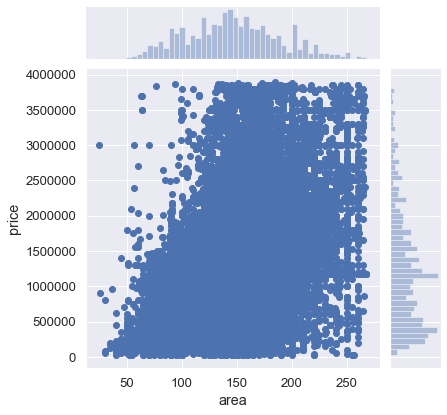

In [168]:
sns.jointplot(x='area',y='price',data=df)

In [26]:
df.groupby('location').describe()['meterprice']


count          mean           std     min       25%  \
location                                                                        
15 May City               193.0   4077.000000   3734.895634   333.0   3157.00   
Abasiya                    89.0   6862.640449   2058.142914   906.0   5925.00   
Ain Shams                1118.0   3930.033095   2126.000998     0.0   2866.75   
Al Amiriyyah               72.0   5025.986111   5043.230595   300.0   3459.25   
Al Manial                  85.0   9203.329412   3601.449504   107.0   6684.00   
Almazah                    79.0  10050.797468   5065.843434  1217.0   7180.00   
Badr City                1684.0   5259.337886   4841.099236     1.0   3000.00   
Basateen                   46.0   4446.173913   2742.592969  1741.0   2666.25   
Dar al-Salaam             199.0   3123.668342   1077.884643   333.0   2500.00   
Downtown Cairo            641.0   7485.021841   5283.322980     3.0   3846.00   
Ezbet El Nakhl            196.0   3275.846939    983.827511   333.0   2702.75   
Gesr Al Suez             1561.0   4069.349776   2354.555287     1.0   2647.00   
Hadayek Helwan            346.0   3692.910405   2887.388902   205.0   2500.00   
Hadayek al-Kobba          394.0   6297.159898   3037.390365   520.0   5000.00   
Heliopolis               1623.0   9925.769563   6354.738365     1.0   6082.50   
Helmeyat El Zaytoun       611.0   6004.803601   3794.707958     1.0   4693.50   
Helwan                    848.0   4143.998821   2223.101366     2.0   2921.50   
Katameya                  496.0  10234.165323   6540.911411   200.0   7046.00   
Maadi                     677.0   9026.652880   5024.873283   117.0   6190.00   
Madinaty                 3818.0  12311.537192   7187.037402     1.0  10415.25   
Marg                      373.0   3238.067024   2176.527838   277.0   2083.00   
Matareya                  324.0   3936.024691   2554.898378     3.0   2943.25   
Mokattam                 1224.0  10206.459967  14883.602037     1.0   5482.00   
Mostakbal City            750.0   9967.205333   5614.761369   554.0   5353.75   
Nasr City                1174.0   8602.567291   5778.913538   200.0   5209.50   
New Cairo - El Tagamoa  12948.0  11418.119169  11909.588822    97.0   6790.00   
New Capital City          705.0  10176.331915   6423.323823     1.0   5934.00   
New Nozha                 357.0   5566.019608   3324.222724   181.0   2800.00   
Obour City                364.0   6705.255495   5617.034127   125.0   5000.00   
Rehab City               1250.0  11335.523200   8853.879531   181.0   6500.00   
Salam City                429.0   3311.237762   2048.814082   312.0   2461.00   
Sayeda Zeinab              93.0   5257.892473   1988.792421   600.0   3882.00   
Sheraton                  467.0  10377.297645   3536.494031   461.0   8600.00   
Shorouk City              578.0   8801.346021   7208.926730   509.0   5147.75   
Shubra                    464.0   7509.909483   3460.206811   150.0   4940.25   
Waili                     102.0   5106.803922   2255.854461   400.0   3156.50   
Zahraa Al Maadi          1084.0   8188.770295   3423.537157     6.0   6750.00   
Zamalek                    97.0  16612.381443   9640.762456   605.0   8333.00   
Zawya al-Hamra            150.0   3994.493333   1468.684430   330.0   3062.50   

                            50%       75%       max  
location                                             
15 May City              3777.0   4500.00   53333.0  
Abasiya                  6923.0   7878.00   10800.0  
Ain Shams                3600.0   4500.00   35000.0  
Al Amiriyyah             4000.0   5606.25   45000.0  
Al Manial                9189.0  11785.00   16428.0  
Almazah                  9166.0  12403.50   27016.0  
Badr City                3857.0   5943.00   85820.0  
Basateen                 3514.5   4628.50   13636.0  
Dar al-Salaam            3083.0   3644.50   11538.0  
Downtown Cairo           6500.0   9333.00   38209.0  
Ezbet El Nakhl           3200.0   3888.00    5882.0  
Ge

Sorting the meterprice per location as we see 

we can see **Zamalek** is the most expensive for meter per price 

**Dar al-Salaam** is the least expensive for meter per price 

In [27]:
print(df.groupby('location').mean()['meterprice'].nlargest(60))


location
Zamalek                   16612.381443
Madinaty                  12311.537192
New Cairo - El Tagamoa    11418.119169
Rehab City                11335.523200
Sheraton                  10377.297645
Katameya                  10234.165323
Mokattam                  10206.459967
New Capital City          10176.331915
Almazah                   10050.797468
Mostakbal City             9967.205333
Heliopolis                 9925.769563
Al Manial                  9203.329412
Maadi                      9026.652880
Shorouk City               8801.346021
Nasr City                  8602.567291
Zahraa Al Maadi            8188.770295
Shubra                     7509.909483
Downtown Cairo             7485.021841
Abasiya                    6862.640449
Obour City                 6705.255495
Hadayek al-Kobba           6297.159898
Helmeyat El Zaytoun        6004.803601
New Nozha                  5566.019608
Badr City                  5259.337886
Sayeda Zeinab              5257.892473
Waili           

location
15 May City                4077.000000
Abasiya                    6862.640449
Ain Shams                  3930.033095
Al Amiriyyah               5025.986111
Al Manial                  9203.329412
Almazah                   10050.797468
Badr City                  5259.337886
Basateen                   4446.173913
Dar al-Salaam              3123.668342
Downtown Cairo             7485.021841
Ezbet El Nakhl             3275.846939
Gesr Al Suez               4069.349776
Hadayek Helwan             3692.910405
Hadayek al-Kobba           6297.159898
Heliopolis                 9925.769563
Helmeyat El Zaytoun        6004.803601
Helwan                     4143.998821
Katameya                  10234.165323
Maadi                      9026.652880
Madinaty                  12311.537192
Marg                       3238.067024
Matareya                   3936.024691
Mokattam                  10206.459967
Mostakbal City             9967.205333
Nasr City                  8602.567291
New Cairo - El T

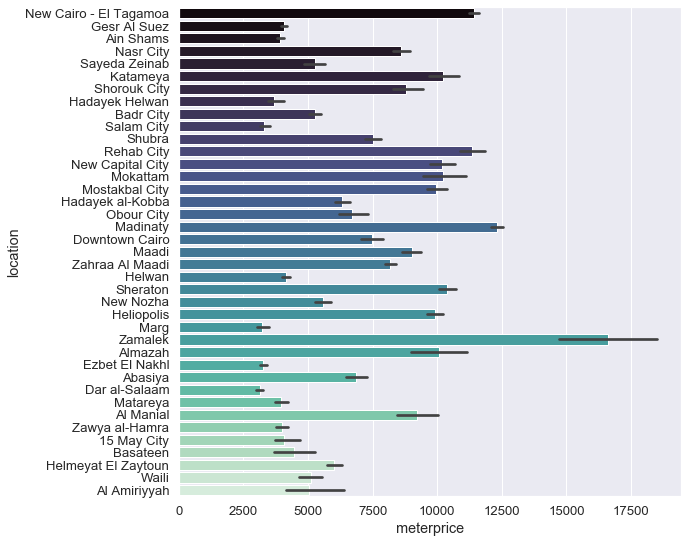

In [28]:
print(df.groupby('location').mean()['meterprice'])
sns.barplot(y='location',x='meterprice',data=df,estimator=np.mean,palette='mako')

as here we can see there are a outliers which we can deal with at after
 
 and the outlier in area because the meter price is price over area

In [29]:
print(df.groupby('location').min()['meterprice'])
df[(df['location']=='Ain Shams') & (df['meterprice']<10)]



location
15 May City                333
Abasiya                    906
Ain Shams                    0
Al Amiriyyah               300
Al Manial                  107
Almazah                   1217
Badr City                    1
Basateen                  1741
Dar al-Salaam              333
Downtown Cairo               3
Ezbet El Nakhl             333
Gesr Al Suez                 1
Hadayek Helwan             205
Hadayek al-Kobba           520
Heliopolis                   1
Helmeyat El Zaytoun          1
Helwan                       2
Katameya                   200
Maadi                      117
Madinaty                     1
Marg                       277
Matareya                     3
Mokattam                     1
Mostakbal City             554
Nasr City                  200
New Cairo - El Tagamoa      97
New Capital City             1
New Nozha                  181
Obour City                 125
Rehab City                 181
Salam City                 312
Sayeda Zeinab              600

C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


url            title  \
26009  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...  شقه ب المهندسين   

            date   location     compound       type   price     area bedrooms  \
26009 2022-02-28  Ain Shams  no_compound  Apartment  385000  1000000        1   

      level  ... landline pets_allowed covered_parking private_garden pool  \
26009     8  ...        0            0               0              0    0   

      maids_room central_ac_heating built_in_kitchen_appliances  month  \
26009          0                  0                           0      2   

       meterprice  
26009           0  

[1 rows x 35 columns]

In [30]:
df[(df['location']=='Badr City') & (df['meterprice']==1)]

url  \
27935  https://www.olx.com.eg/en/ad/%D8%A8%D8%B3%D8%B...   

                                                   title       date  \
27935  بسعر محروووق شقة سكن مصر 116متر الأقرب للعاصمه... 2022-02-28   

        location    compound       type   price    area bedrooms level  ...  \
27935  Badr City  Sakan Masr  Apartment  120000  115155        3     1  ...   

      landline pets_allowed covered_parking private_garden pool maids_room  \
27935        0            0               0              0    0          0   

      central_ac_heating built_in_kitchen_appliances  month  meterprice  
27935                  0                           0      2           1  

[1 rows x 35 columns]

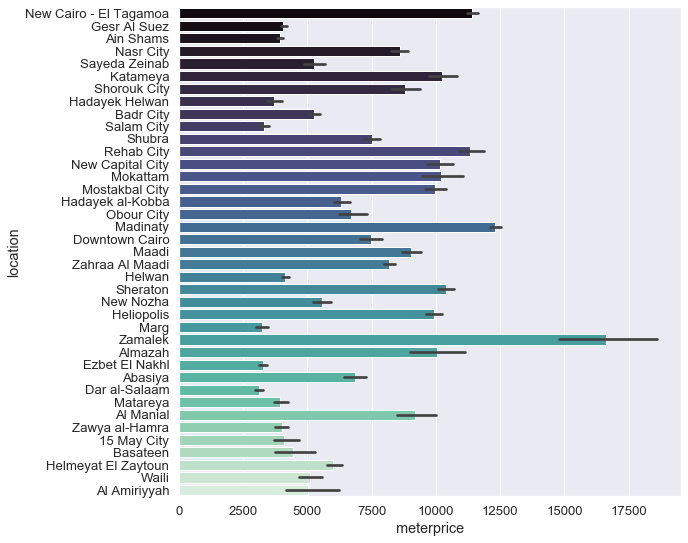

In [31]:
sns.barplot(y='location',x='meterprice',data=df,estimator=np.mean,palette='mako')

the most down_payment value is in New Capital City as we can see 

In [64]:
print(df.groupby('location').mean()['down_payment'].nlargest(10))


location
New Capital City    52054.889362
Mostakbal City      33062.754339
Badr City           26454.787753
Shorouk City        21628.562284
Zahraa Al Maadi     17136.837638
Rehab City          16913.744000
Heliopolis          15874.091805
Almazah             15009.493671
Katameya            14243.885081
Maadi               12366.505170
Name: down_payment, dtype: float64


In [138]:
df.index[1357]

1357

location
New Capital City    52054.889362
Mostakbal City      33018.670667
Badr City           26423.368765
Shorouk City        21628.562284
Zahraa Al Maadi     17136.837638
Rehab City          16913.744000
Heliopolis          15874.091805
Almazah             15009.493671
Katameya            14243.885081
Maadi               12366.505170
Name: down_payment, dtype: float64


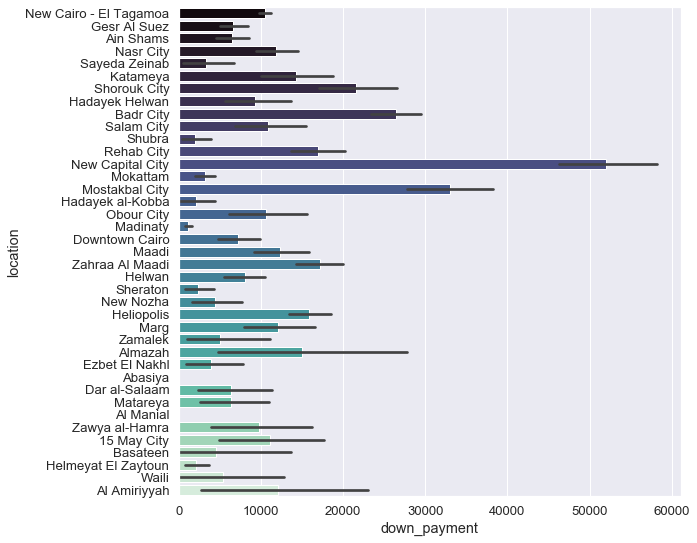

In [160]:
print(df.groupby('location').mean()['down_payment'])
sns.barplot(y='location',x='down_payment',data=df,estimator=np.mean,palette='mako')

In [35]:
# df[df['down_payment']<0]=0

Top 10 largest apartment's area


In [165]:
df.groupby('location').mean()['area'].nlargest(10)

location
New Cairo - El Tagamoa    165.121023
Nasr City                 162.668654
Shorouk City              159.000000
Zamalek                   157.164948
Maadi                     156.852290
Rehab City                156.420800
Mokattam                  154.856209
Zahraa Al Maadi           154.840406
Heliopolis                154.441158
Obour City                151.043956
Name: area, dtype: float64

location
15 May City                88.217617
Abasiya                   136.235955
Ain Shams                 114.932916
Al Amiriyyah              105.847222
Al Manial                 139.988235
Almazah                   149.797468
Badr City                 136.153207
Basateen                  113.260870
Dar al-Salaam             102.623116
Downtown Cairo            130.301092
Ezbet El Nakhl            103.505102
Gesr Al Suez              130.764894
Hadayek Helwan            130.297688
Hadayek al-Kobba          129.855330
Heliopolis                154.441158
Helmeyat El Zaytoun       127.549918
Helwan                    121.762972
Katameya                  150.495968
Maadi                     156.852290
Madinaty                  131.581456
Marg                      102.908847
Matareya                  108.842593
Mokattam                  154.856209
Mostakbal City            138.628000
Nasr City                 162.668654
New Cairo - El Tagamoa    165.121023
New Capital City          139

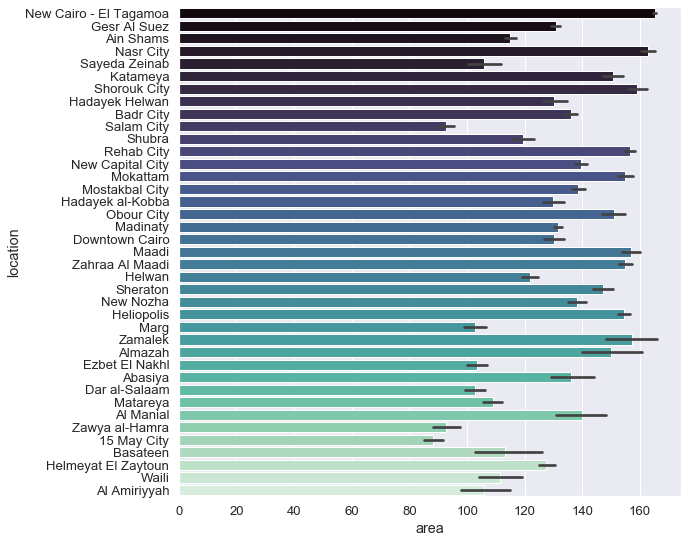

In [163]:
print(df.groupby('location').mean()['area'])
sns.barplot(y='location',x='area',data=df,estimator=np.mean,palette='mako')

In [191]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

Biggest areas are in those compound

In [192]:
df.groupby('compound').mean()['area'].nlargest(1000).head(10)


compound
Village Avenue         257.000000
Gharb Golf             250.000000
Wahet El Ryhan         235.000000
GCR Golf City          220.000000
Al Maram Landmark      214.500000
Promenade New Cairo    212.142857
Sky Capital View       200.000000
Serena Heights         200.000000
Sun Capital            200.000000
Stella Compounds       200.000000
Name: area, dtype: float64

least area size in compunds are :

In [188]:
df.groupby('compound').mean()['area'].nlargest(1000).tail()


compound
Jewels                 82.500000
Cairo Town             75.750000
Continental Gardens    75.000000
Alico city             71.444444
Haram City             65.666667
Name: area, dtype: float64

most expensive meter price in compunds are in 

In [193]:
df.groupby('compound').mean()['meterprice'].nlargest(1000).head(10)


compound
Sun Capital                 22500.000000
Badya Palm Hills            20401.500000
Gharb Golf                  20400.000000
Katameya Plaza              18334.107143
Village Gardens Katameya    17777.666667
Palm Hills Katameya         17664.800000
Village Gate                17300.285714
The Village                 17276.229167
Mountain View Executive     17064.807692
Valore Sheraton             16969.000000
Name: meterprice, dtype: float64

most least meter price in compunds are in 

In [198]:
df.groupby('compound').mean()['meterprice'].nlargest(1000).tail(10)


compound
Ethmar Compound    2571.0
Jada               2266.0
Midtown Sky        2239.0
Blue Vert          1917.0
Dreamland          1100.0
Wahet El Ryhan     1000.0
Etlalah             300.0
Al Rabwa            200.0
Village Avenue      116.0
The Curve           107.0
Name: meterprice, dtype: float64

most expensive down payment in compunds are in

In [200]:
df.groupby('compound').mean()['down_payment'].nlargest(1000).head(10)


compound
Wahet El Ryhan      235000.000000
Sky Capital View    220000.000000
Stella New Cairo    180000.000000
Sueno               172620.000000
Dreamland           165000.000000
Lakefront           159180.000000
Catalan             134650.000000
Floria              133750.000000
Botanica            120602.944444
El Ofok El Gadid    120000.000000
Name: down_payment, dtype: float64

The price with Negotiable option is cheeper than Not Negotiable per meterprice

In [202]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

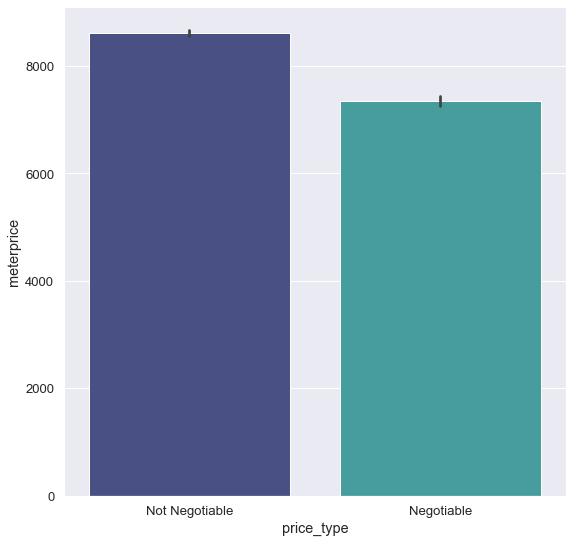

In [18]:
df.groupby('price_type').describe()['meterprice']
sns.barplot(x='price_type',y='meterprice',data=df,estimator=np.mean,palette='mako')

there was a int 3 category and '3' category so we merge it togther by replacing csv data types error

In [ ]:
df[df['bedrooms']==3]

In [ ]:
df[df['bedrooms']=='3']

In [78]:
df['bedrooms']=df['bedrooms'].astype(str)


In [79]:
df['bedrooms'].value_counts()

3      25216
2      11354
4        681
1        331
5         77
6         29
10         5
10+        5
8          4
7          4
9          3
Name: bedrooms, dtype: int64

as we see  apartments with 3 bedroom are the most expensive 

and with 

bedrooms
3      203722076
2      102111602
4        4679394
1        1953629
5         478871
6         207418
7          40448
10+        34794
8          22950
10         13112
9          12473
Name: meterprice, dtype: int64


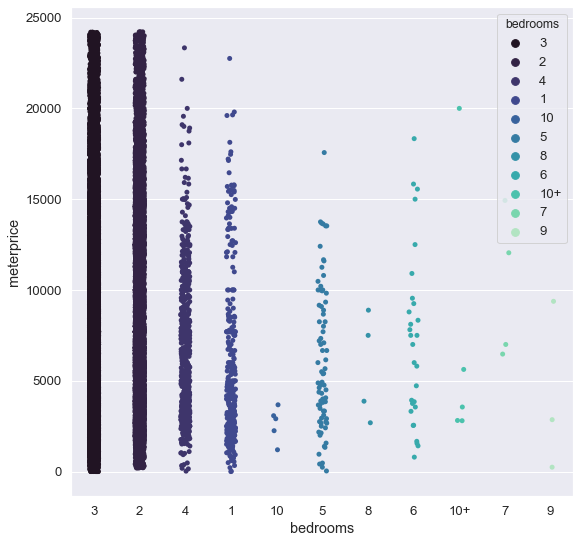

In [66]:
print(df.groupby('bedrooms').sum()['meterprice'].nlargest(20))

sns.stripplot(y='meterprice',x='bedrooms',hue='bedrooms' ,data=df, color="#474646",palette='mako')

In [ ]:
df['bathrooms']=df['bathrooms'].astype(str)

In [36]:
df['bedrooms'].value_counts()

3      25216
2      11354
4        681
1        331
5         77
6         29
10         5
10+        5
8          4
7          4
9          3
Name: bedrooms, dtype: int64

s

In [65]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

bathrooms
2      143349433
3       98100083
1       70692549
4         898604
5         123972
7          32956
6          23168
8          22091
10         15267
10+        13867
9           4777
Name: meterprice, dtype: int64


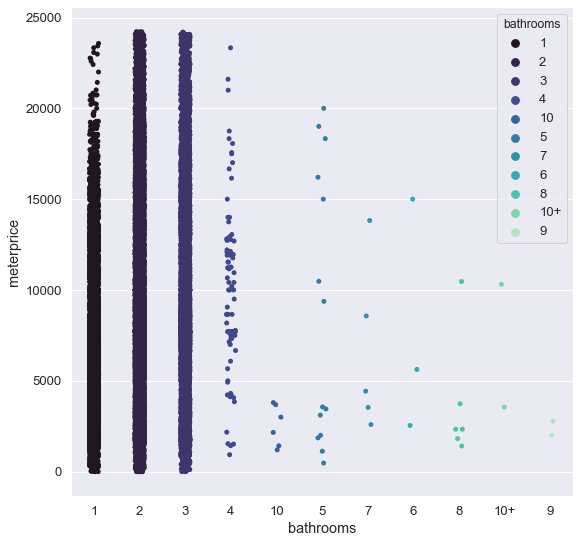

In [87]:
print(df.groupby('bathrooms').sum()['meterprice'].nlargest(20))

sns.stripplot(y='meterprice',x='bathrooms',hue='bathrooms' ,data=df, color="#474646",palette='mako')

people perfer to buy with Installment rather than cash maybe it's new brides apart

payment_option
Installment            9105.243922
Cash                   8261.414259
Cash or Installment    8108.148033
Name: meterprice, dtype: float64


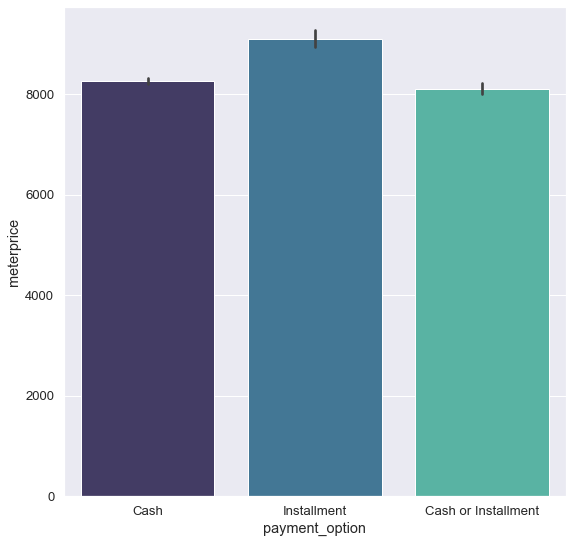

In [94]:
print(df.groupby('payment_option').mean()['meterprice'].nlargest(20))

sns.barplot(x='payment_option',y='meterprice' ,data=df, color="#474646",palette='mako')

In [95]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

In [88]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

as we see this is a logical data the price of finished meter is more expensive than all other options

delivery_term
Finished         9366.902316
Semi Finished    9341.761994
Core & Shell     6723.159497
Not Finished     5382.391654
Name: meterprice, dtype: float64


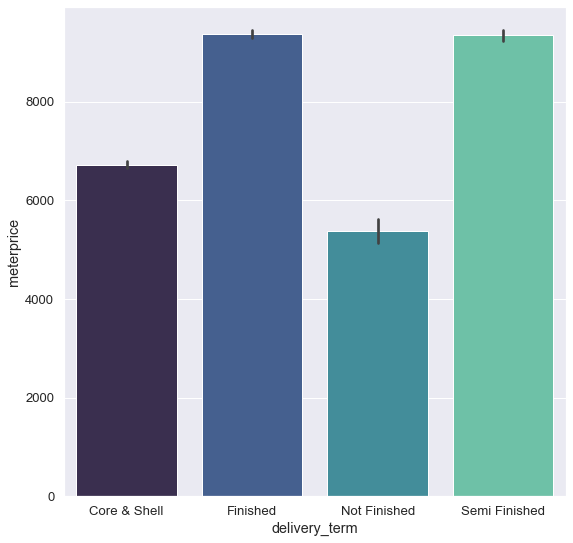

In [100]:
print(df.groupby('delivery_term').mean()['meterprice'].nlargest(20))

sns.barplot(x='delivery_term',y='meterprice' ,data=df, color="#474646",palette='mako')

it's logical to see the ready to move is the most expensive

delivery_date
Ready to move      269367655
2024                12206988
soon                10456895
2023                 7846061
2025                 4636039
2022                 4440991
within 6 months      3516614
2026                  761655
2027                   26930
2030                   12234
2028                    4705
Name: meterprice, dtype: int64


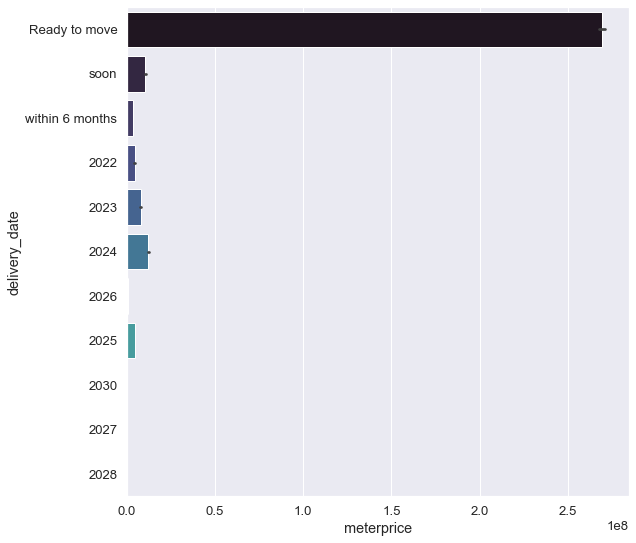

In [105]:
print(df.groupby('delivery_date').sum()['meterprice'].nlargest(20))

sns.barplot(y='delivery_date',x='meterprice' ,data=df,estimator=np.sum, color="#474646",palette='mako')

electricity_meter
1    182541288
0    130735479
Name: meterprice, dtype: int64


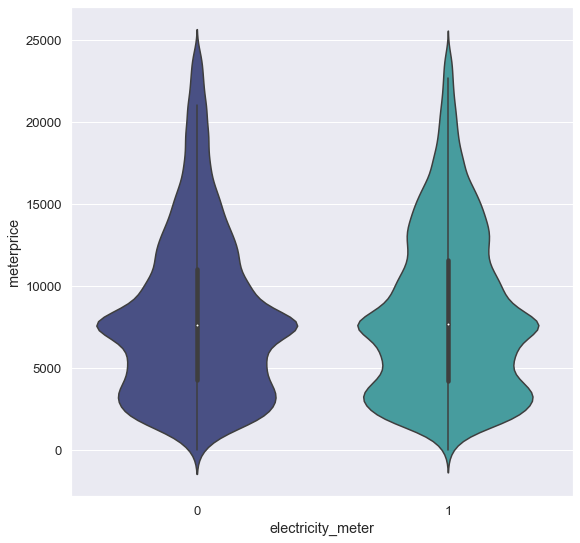

In [114]:
print(df.groupby('electricity_meter').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='electricity_meter' ,data=df,estimator=np.sum, color="#474646",palette='mako')



In [101]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

balcony
1    192702433
0    120574334
Name: meterprice, dtype: int64


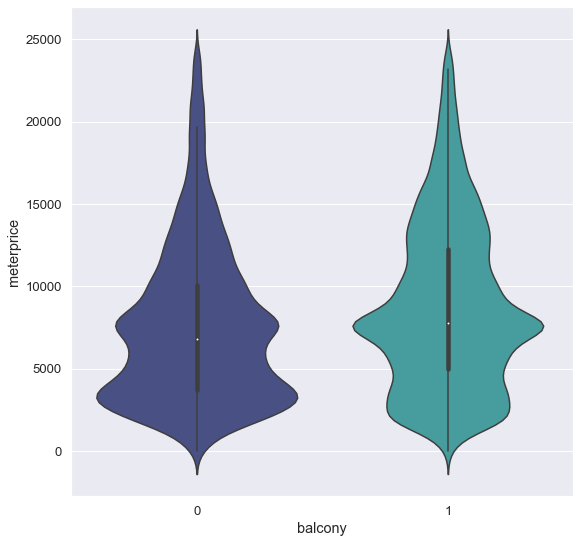

In [115]:
print(df.groupby('balcony').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='balcony' ,data=df,estimator=np.sum, color="#474646",palette='mako')



water_meter
1    170532198
0    142744569
Name: meterprice, dtype: int64


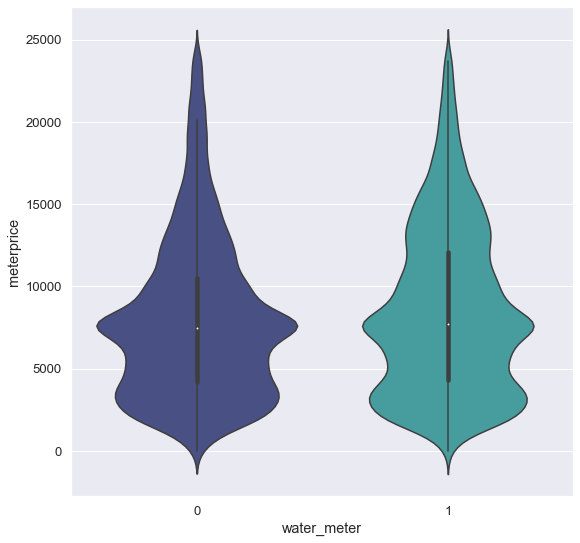

In [116]:
print(df.groupby('water_meter').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='water_meter' ,data=df,estimator=np.sum, color="#474646",palette='mako')



elevator
1    165045212
0    148231555
Name: meterprice, dtype: int64


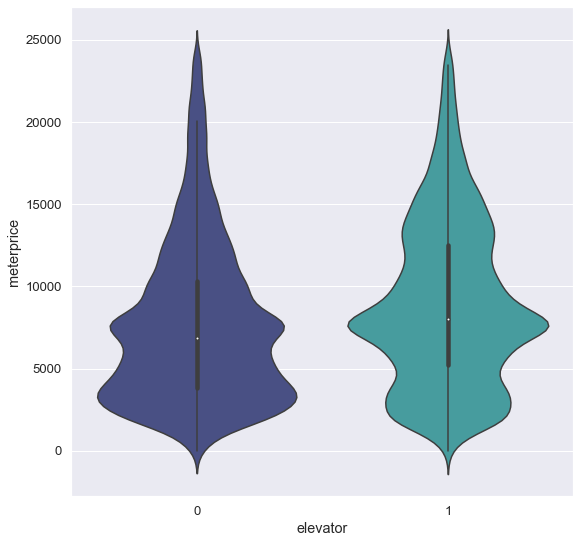

In [117]:
print(df.groupby('elevator').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='elevator' ,data=df,estimator=np.sum, color="#474646",palette='mako')



In [106]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

security
1    171189061
0    142087706
Name: meterprice, dtype: int64


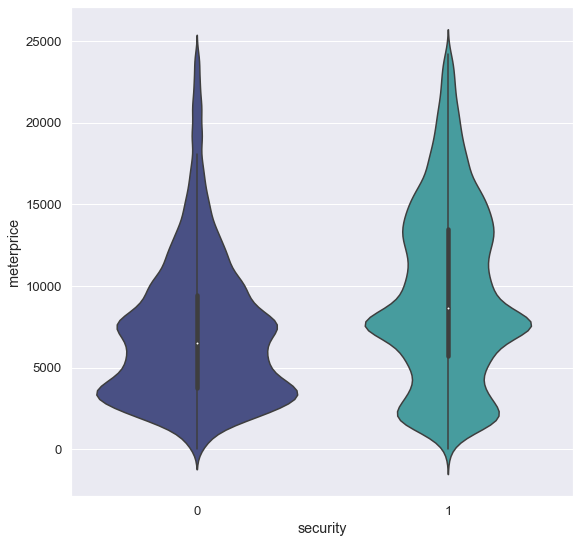

In [118]:
print(df.groupby('security').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='security' ,data=df,estimator=np.sum, color="#474646",palette='mako')



natural_gas
1    162811227
0    150465540
Name: meterprice, dtype: int64


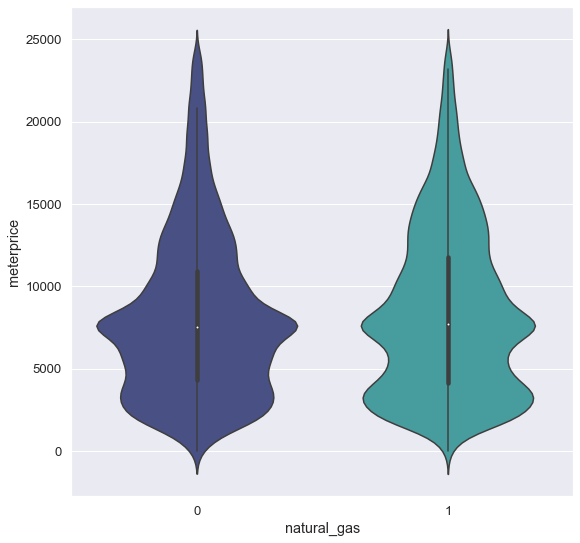

In [119]:
print(df.groupby('natural_gas').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='natural_gas' ,data=df,estimator=np.sum, color="#474646",palette='mako')


landline
1    8973.708824
0    7917.172199
Name: meterprice, dtype: float64


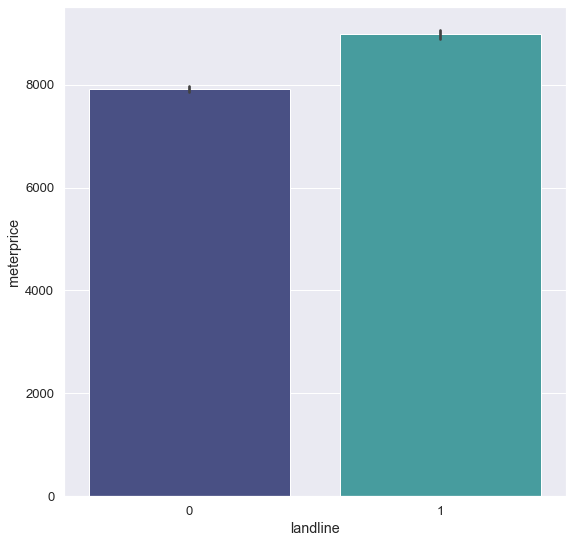

In [131]:

print(df.groupby('landline').mean()['meterprice'].nlargest(20))
sns.barplot(y='meterprice',x='landline' ,data=df,estimator=np.mean, color="#474646",palette='mako')



pets_allowed
1    9649.711447
0    7603.195414
Name: meterprice, dtype: float64


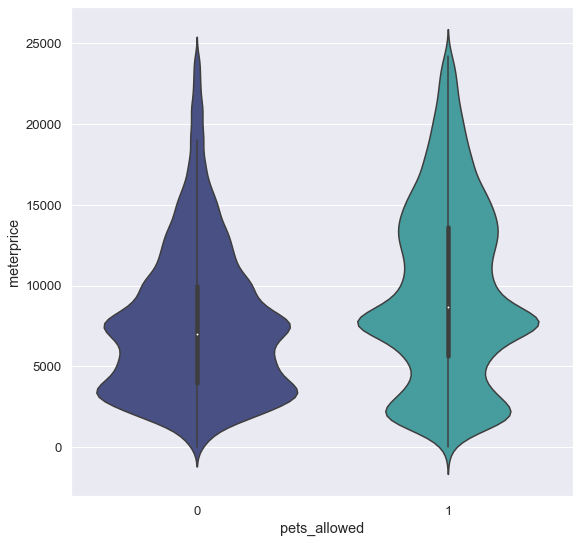

In [132]:
print(df.groupby('pets_allowed').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='pets_allowed' ,data=df,estimator=np.mean, color="#474646",palette='mako')



covered_parking
1    9476.464469
0    7704.756663
Name: meterprice, dtype: float64


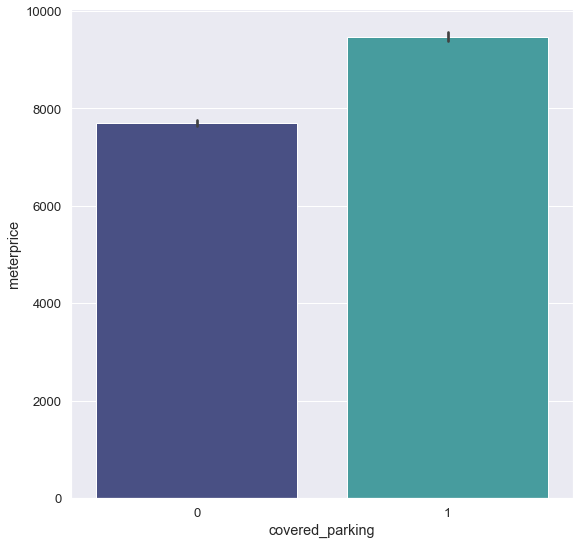

In [142]:
print(df.groupby('covered_parking').mean()['meterprice'].nlargest(20))
sns.barplot(y='meterprice',x='covered_parking' ,data=df,color="#474646",palette='mako')



private_garden
1    10280.937281
0     7754.380509
Name: meterprice, dtype: float64


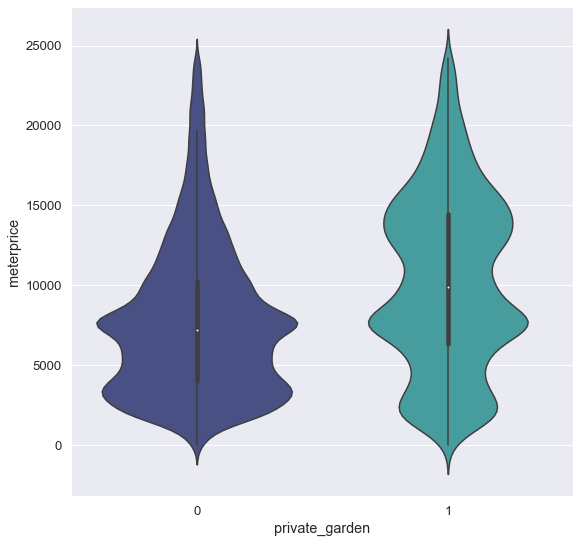

In [143]:
print(df.groupby('private_garden').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='private_garden' ,data=df,estimator=np.mean, color="#474646",palette='mako')



pool
1    10721.933901
0     7944.479025
Name: meterprice, dtype: float64


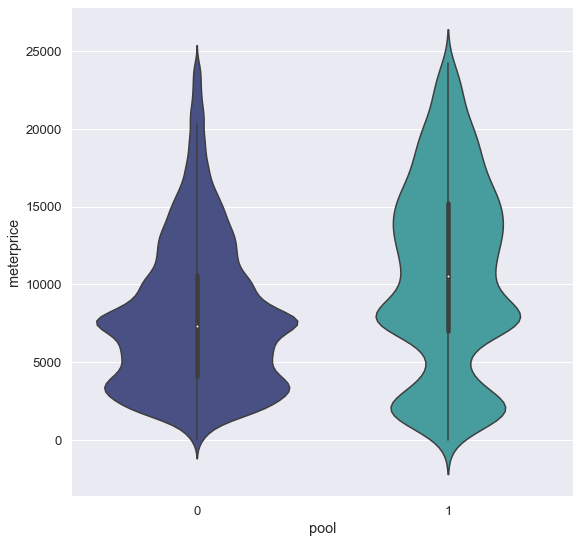

In [144]:
print(df.groupby('pool').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='pool' ,data=df,estimator=np.mean, color="#474646",palette='mako')


maids_room
1    10498.062994
0     8044.342355
Name: meterprice, dtype: float64


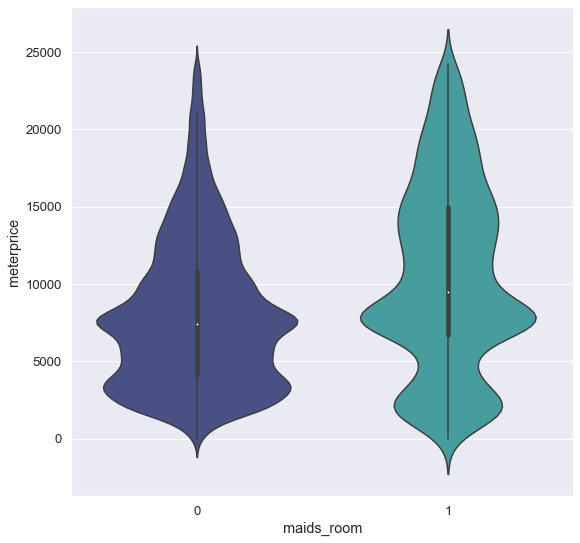

In [145]:

print(df.groupby('maids_room').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='maids_room' ,data=df,estimator=np.mean, color="#474646",palette='mako')



central_ac_heating
1    10510.189489
0     8028.507530
Name: meterprice, dtype: float64


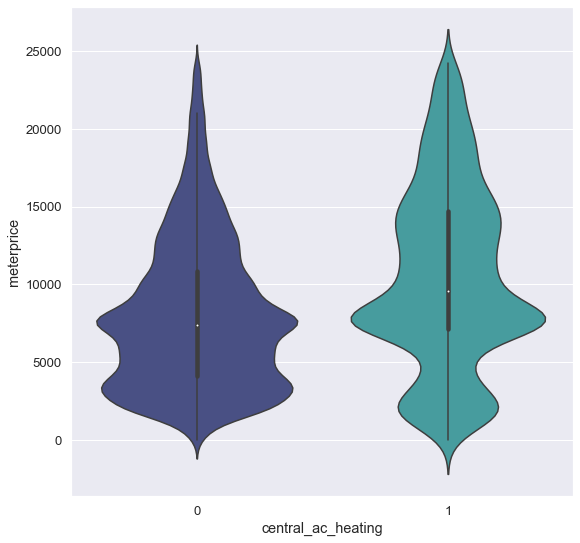

In [146]:
print(df.groupby('central_ac_heating').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='central_ac_heating' ,data=df,estimator=np.mean, color="#474646",palette='mako')



built_in_kitchen_appliances
1    10044.296593
0     8102.142391
Name: meterprice, dtype: float64


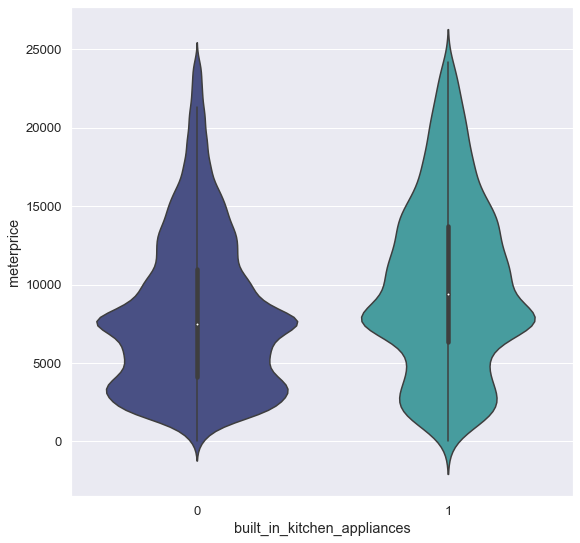

In [147]:
print(df.groupby('built_in_kitchen_appliances').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='built_in_kitchen_appliances' ,data=df,estimator=np.mean, color="#474646",palette='mako')



month
5     11212.000000
3      8544.775329
4      8385.976112
2      8210.165121
1      8190.168589
8      7131.250000
7      6500.000000
12     5793.684211
9      5525.666667
11     5207.666667
10     4842.250000
6       750.000000
Name: meterprice, dtype: float64


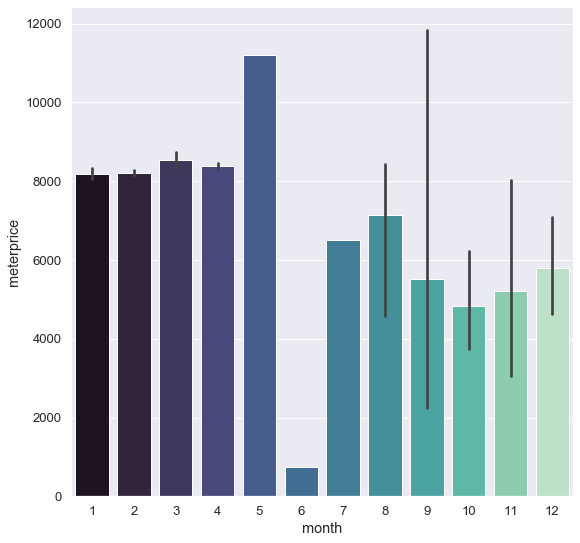

In [148]:
print(df.groupby('month').mean()['meterprice'].nlargest(20))
sns.barplot(y='meterprice',x='month' ,data=df,estimator=np.mean, color="#474646",palette='mako')


furnished
Yes    8853.173649
No     8285.463855
Name: meterprice, dtype: float64


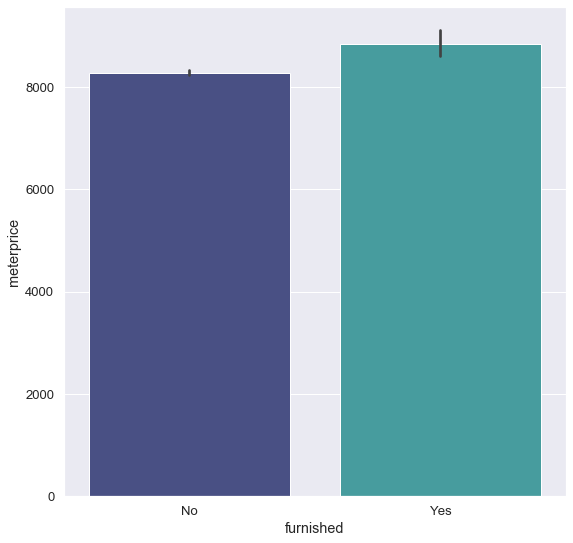

In [150]:
print(df.groupby('furnished').mean()['meterprice'].nlargest(20))
sns.barplot(y='meterprice',x='furnished' ,data=df,estimator=np.mean, color="#474646",palette='mako')


In [158]:
df['level'].value_counts()

2          7957
3          6477
1          5957
Ground     4952
4          3691
5          2886
6          1410
7           859
10+         831
8           800
9           770
10          716
Highest     403
Name: level, dtype: int64

level
Ground     9464.272213
2          9062.333166
3          8713.714220
1          8686.893235
4          7849.120022
5          7415.038115
6          7160.885816
7          6381.504075
8          6077.811250
9          6018.729870
10         5631.585196
Highest    5473.104218
10+        5331.102286
Name: meterprice, dtype: float64


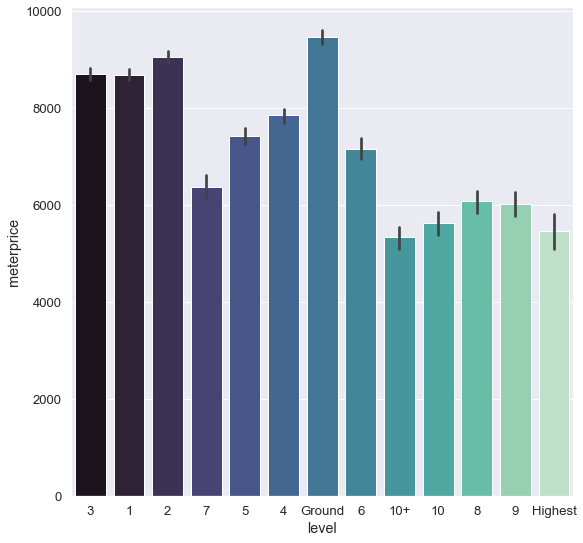

In [159]:
print(df.groupby('level').mean()['meterprice'].nlargest(20))
sns.barplot(y='meterprice',x='level' ,data=df,estimator=np.mean, color="#474646",palette='mako')


# MultiVariate Analysis

In [192]:
x=pd.pivot_table(index='location',values='meterprice',columns='compound',data=df,aggfunc=np.mean)
x

compound                2020 Compound  90 Avenue     ABHA    ALBA  \
location                                                            
15 May City                       NaN        NaN      NaN     NaN   
Abasiya                           NaN        NaN      NaN     NaN   
Ain Shams                 5327.000000   3555.000   3917.0  5937.0   
Al Amiriyyah                      NaN        NaN      NaN     NaN   
Al Manial                         NaN  12857.000      NaN     NaN   
Almazah                   2235.000000        NaN      NaN     NaN   
Badr City                 9917.000000        NaN   2878.0  2777.0   
Basateen                          NaN        NaN      NaN     NaN   
Dar al-Salaam                     NaN        NaN      NaN  2857.0   
Downtown Cairo            8617.333333        NaN   3000.0     NaN   
Ezbet El Nakhl                    NaN        NaN      NaN     NaN   
Gesr Al Suez              4362.200000   7200.000   2451.5     NaN   
Hadayek Helwan            5576.500000        NaN      NaN     NaN   
Hadayek al-Kobba          6666.000000        NaN   4166.0     NaN   
Heliopolis                        NaN        NaN      NaN  8500.0   
Helmeyat El Zaytoun       2767.000000   6284.000      NaN     NaN   
Helwan                    2867.000000        NaN   4013.0     NaN   
Katameya                          NaN        NaN  12955.0     NaN   
Maadi                     7735.000000        NaN      NaN     NaN   
Madinaty                          NaN        NaN      NaN     NaN   
Marg                              NaN        NaN      NaN     NaN   
Matareya                  3764.500000        NaN   3800.0     NaN   
Mokattam                  8092.666667        NaN      NaN     NaN   
Mostakbal City                    NaN        NaN      NaN     NaN   
Nasr City                 8345.666667        NaN      NaN     NaN   
New Cairo - El Tagamoa    7939.454545  11145.625   3634.5  2281.0   
New Capital City                  NaN        NaN      NaN     NaN   
New Nozha                 4545.500000        NaN      NaN     NaN   
Obour City                4061.500000        NaN      NaN     NaN   
Rehab City                        NaN        NaN      NaN     NaN   
Salam City                2187.000000   3250.000   2916.0     NaN   
Sayeda Zeinab                     NaN        NaN      NaN  5000.0   
Sheraton                  8250.200000        NaN      NaN     NaN   
Shorouk City                      NaN        NaN      NaN     NaN   
Shubra                            NaN        NaN      NaN  4666.0   
Waili                             NaN        NaN   6521.0     NaN   
Zahraa Al Maadi                   NaN        NaN      NaN     NaN   
Zamalek                           NaN        NaN      NaN     NaN   
Zawya al-Hamra                    NaN        NaN   3166.0     NaN   

compound                        AZAD  Abu Al-Hool     Aeon         Agora  \
location                                                                   
15 May City                      NaN          NaN      NaN           NaN   
Abasiya                          NaN          NaN      NaN   5000.000000   
Ain Shams                        NaN          NaN      NaN           NaN   
Al Amiriyyah                     NaN          NaN      NaN           NaN   
Al Manial                        NaN          NaN      NaN           NaN   
Almazah                          NaN          NaN      NaN           NaN   
Badr City                        NaN          NaN  23856.0   3591.428571   
Basateen                         NaN          NaN      NaN           NaN   
Dar al-Salaam                    NaN          NaN      NaN           NaN   
Downtown Cairo                   NaN     3942.000   3653.0           NaN   
Ezbet El Nakhl                   NaN          NaN      NaN           NaN   
Gesr Al Suez                     NaN     7083.000   2592.0   3387.750000   
Hadayek Helwan                   NaN          NaN      NaN           NaN   
Hadayek al-Kobba              

In [175]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

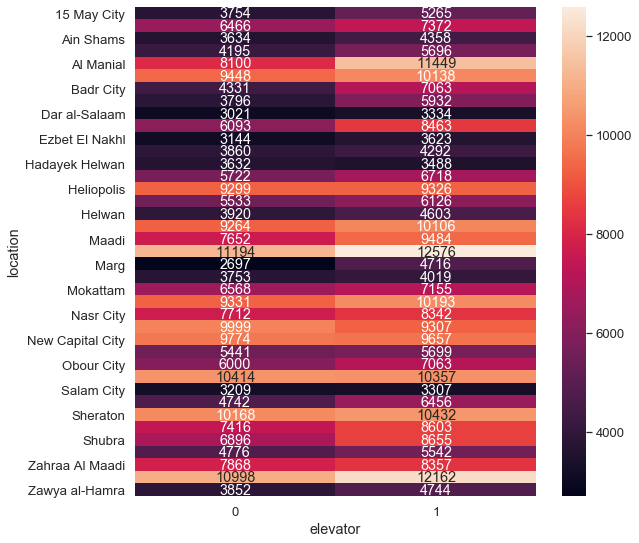

In [195]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [196]:
x=pd.pivot_table(index='location',values='meterprice',columns='bedrooms',sort=True,data=df,aggfunc=np.mean)
x

bedrooms                           1      10      10+             2  \
location                                                              
15 May City              3288.500000     NaN      NaN   3769.901786   
Abasiya                          NaN     NaN      NaN   6963.500000   
Ain Shams                2508.148148     NaN   3555.0   3722.651852   
Al Amiriyyah             3000.000000     NaN   5625.0   4074.720000   
Al Manial                        NaN     NaN      NaN   9053.258065   
Almazah                  9649.666667     NaN  20000.0   9855.047619   
Badr City                4206.888889     NaN      NaN   4462.955026   
Basateen                 3319.000000     NaN      NaN   4304.277778   
Dar al-Salaam            2503.333333  2909.0   2800.0   3284.136986   
Downtown Cairo           6650.619048     NaN      NaN   6538.860870   
Ezbet El Nakhl           3780.200000     NaN   2814.0   3366.545455   
Gesr Al Suez             3806.625000  3076.0      NaN   4109.881526   
Hadayek Helwan           2559.000000     NaN      NaN   3856.196581   
Hadayek al-Kobba         5542.714286     NaN      NaN   5795.578947   
Heliopolis               8256.238095  1200.0      NaN   8967.422037   
Helmeyat El Zaytoun      5806.375000     NaN      NaN   5498.020619   
Helwan                   3868.217391     NaN      NaN   3898.675241   
Katameya                13673.100000     NaN      NaN  10373.330645   
Maadi                    8912.000000     NaN      NaN   9266.221675   
Madinaty                17469.000000     NaN      NaN  12075.858800   
Marg                     2066.923077     NaN      NaN   2956.849057   
Matareya                 2901.500000  2250.0      NaN   4092.775862   
Mokattam                 6492.583333     NaN      NaN   6567.177112   
Mostakbal City          12354.307692     NaN      NaN  10275.706612   
Nasr City               11419.750000  3677.0      NaN   8969.580645   
New Cairo - El Tagamoa   9151.800000     NaN      NaN  12392.438729   
New Capital City        13642.000000     NaN      NaN  10592.959091   
New Nozha               14500.000000     NaN      NaN   6081.528455   
Obour City               6476.250000     NaN      NaN   6685.579439   
Rehab City              13709.000000     NaN      NaN  12890.936803   
Salam City               2620.653846     NaN      NaN   3230.715481   
Sayeda Zeinab            4750.000000     NaN      NaN   5051.255319   
Sheraton                11045.000000     NaN      NaN   9366.802260   
Shorouk City             8815.500000     NaN      NaN   8237.669355   
Shubra                   4690.352941     NaN      NaN   7089.649215   
Waili                    4750.750000     NaN      NaN   5033.723404   
Zahraa Al Maadi          9766.555556     NaN      NaN   8523.030201   
Zamalek                 12564.600000     NaN      NaN  11260.666667   
Zawya al-Hamra           3969.000000     NaN      NaN   3747.901639   

bedrooms                           3             4             5  \
location                                                           
15 May City              3972.012987           NaN           NaN   
Abasiya                  6864.183673   5692.666667   6666.000000   
Ain Shams                4048.423438   3752.885714   5061.857143   
Al Amiriyyah             4832.897436   4585.800000   2666.000000   
Al Manial                9489.725490   5885.333333           NaN   
Almazah                  9607.259259           NaN           NaN   
Badr City                5268.018082   5524.666667   2703.666667   
Basateen                 4552.000000   2209.666667  13636.000000   
Dar al-Salaam            3073.054545   2803.571429   3478.000000   
Downtown Cairo           7495.514368   7770.166667   5583.000000   
Ezbet El Nakhl           3230.811321   2593.000000   3103.000000   
Gesr Al Suez             4028.849950   4110.688889   3841.500000   
Hadayek Helwan           3417.956938   3728.866667           NaN   
Hadayek al-Kobba         6354.265487   6836.391304   4633.333333   


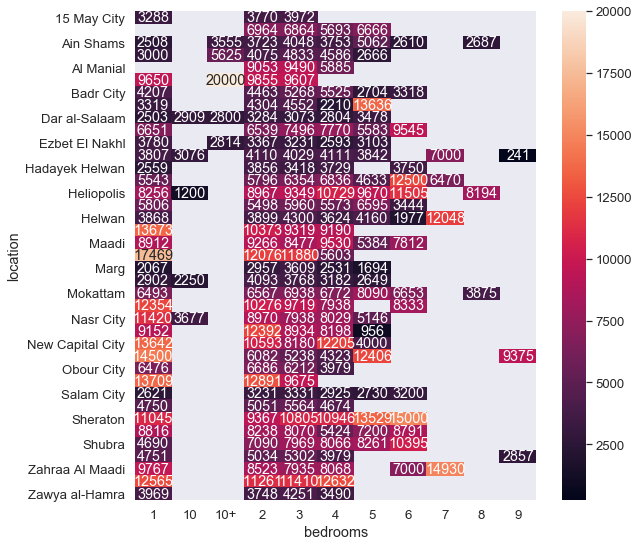

In [197]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [198]:
x=pd.pivot_table(index='location',values='meterprice',columns='level',data=df,aggfunc=np.mean)
x

level                              1            10           10+  \
location                                                           
15 May City              3990.764706           NaN           NaN   
Abasiya                  7718.833333   7839.000000   8434.750000   
Ain Shams                4322.730337   3593.957447   3602.408602   
Al Amiriyyah             5405.444444           NaN   5979.000000   
Al Manial                6476.181818  13356.333333  11435.000000   
Almazah                  9399.700000   5792.000000   8861.750000   
Badr City                5582.129310   6404.647059   2933.285714   
Basateen                 4650.200000   3454.000000   3152.600000   
Dar al-Salaam            4013.500000   3771.363636   2980.562500   
Downtown Cairo           8335.885714   6289.583333   5593.821429   
Ezbet El Nakhl           3163.777778   2992.090909   3098.555556   
Gesr Al Suez             4646.742188   3627.663866   3038.616667   
Hadayek Helwan           4039.321429   3035.387097   3129.866667   
Hadayek al-Kobba         5649.102564   5928.181818   6032.935484   
Heliopolis               8532.399015   8721.225000   9689.740000   
Helmeyat El Zaytoun      5851.463415   5778.040816   5573.979167   
Helwan                   4712.263889   4304.103448   4236.823529   
Katameya                 9653.477612  10033.333333   8556.333333   
Maadi                    9468.848485   7908.966667   8209.735294   
Madinaty                11584.998158           NaN           NaN   
Marg                     3397.558824   2715.166667   2206.000000   
Matareya                 3776.781250   4138.409091   3726.812500   
Mokattam                 7205.429224   6325.142857   4411.333333   
Mostakbal City           9341.710938           NaN   7222.000000   
Nasr City                7432.300752   7124.627451   6514.595238   
New Cairo - El Tagamoa   9626.835509   5893.695652   6505.428571   
New Capital City         7819.612069   5333.000000  10493.200000   
New Nozha                6487.966667   3305.625000   3644.833333   
Obour City               6819.473684   7532.444444   7964.173913   
Rehab City               9936.446352           NaN   4758.000000   
Salam City               3517.178571   2864.777778   2944.400000   
Sayeda Zeinab            3652.400000   6749.600000   4327.000000   
Sheraton                10253.734375   8276.636364   6395.200000   
Shorouk City             7903.345070           NaN           NaN   
Shubra                   6863.367347   9327.846154   9759.208333   
Waili                    4934.571429   7132.000000   5253.000000   
Zahraa Al Maadi          8316.421488   7479.137255   8385.113636   
Zamalek                  9951.545455   7700.000000  13228.571429   
Zawya al-Hamra           4563.714286   3724.000000   3479.000000   

level                              2             3             4  \
location                                                           
15 May City              4082.666667   4073.034483   4013.272727   
Abasiya                  7070.166667   5630.000000   6645.562500   
Ain Shams                3928.750000   4279.514286   3974.857143   
Al Amiriyyah             4207.153846   3861.538462   4318.538462   
Al Manial                9296.800000   9316.545455  10436.166667   
Almazah                 12932.384615   9000.444444   9902.461538   
Badr City                5026.125654   5002.919614   5065.575758   
Basateen                 4327.416667   5557.400000   4612.000000   
Dar al-Salaam            3052.789474   2930.736842   3208.965517   
Downtown Cairo           7738.372093   6801.611111   6366.154762   
Ezbet El Nakhl           3816.400000   3380.960000   3209.466667   
Gesr Al Suez             4378.933333   4881.389313   4352.553191   
Hadayek Helwan           4143.107143   3691.822222   4021.394737   
Hadayek al-Kobba         6232.327273   6135.777778   6397.391304   
Heliopolis               8993.847584   8918.861538   8409.078534   
Helmeyat El Zaytoun      6143.716418   5601.575342   56

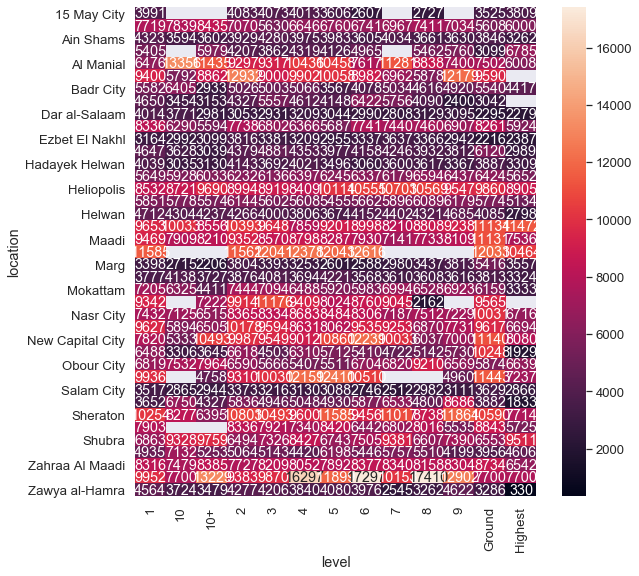

In [199]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [200]:
x=pd.pivot_table(index='location',values='meterprice',columns='furnished',data=df,aggfunc=np.mean)
x

furnished                         No           Yes
location                                          
15 May City              3833.560847   4171.250000
Abasiya                  6825.024390   7303.285714
Ain Shams                3845.848113   4621.258621
Al Amiriyyah             4527.014085   3153.000000
Al Manial                9240.542857   9029.666667
Almazah                  9017.492308  13468.571429
Badr City                5069.492192   5264.674699
Basateen                 4333.090909   6934.000000
Dar al-Salaam            3102.091837   4533.333333
Downtown Cairo           7094.885666   7484.054545
Ezbet El Nakhl           3281.089005   3075.600000
Gesr Al Suez             3966.118126   5506.022727
Hadayek Helwan           3549.777448   4352.444444
Hadayek al-Kobba         6128.600559   6715.083333
Heliopolis               9131.428859  11356.488722
Helmeyat El Zaytoun      5753.835052   6506.482759
Helwan                   4060.355664   5491.074074
Katameya                 9703.507307   8621.764706
Maadi                    8695.373089   9609.260870
Madinaty                11958.243186  14238.948718
Marg                     3239.876033   3172.400000
Matareya                 3804.574257   4192.571429
Mokattam                 6781.369298   7244.047619
Mostakbal City           9933.890244   8823.083333
Nasr City                8108.907124   8544.353846
New Cairo - El Tagamoa   9588.194050  11436.559767
New Capital City         9725.113869   8614.700000
New Nozha                5544.750000   5848.480000
Obour City               6332.177465   6712.444444
Rehab City              10350.600000  11068.266667
Salam City               3205.306220   3641.636364
Sayeda Zeinab            5256.211111   5308.333333
Sheraton                10317.035800  10038.937500
Shorouk City             8056.463845   9695.272727
Shubra                   7360.104513   8976.604651
Waili                    5047.690722   6253.600000
Zahraa Al Maadi          8082.603865   8955.755102
Zamalek                 10858.473684  13774.809524
Zawya al-Hamra           3956.244755   4775.857143

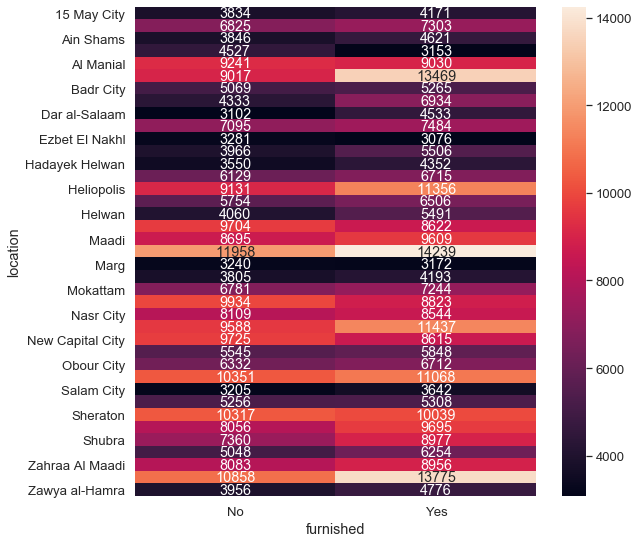

In [201]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [202]:
x=pd.pivot_table(index='location',values='meterprice',columns='bathrooms',data=df,aggfunc=np.mean)
x

bathrooms                          1      10      10+             2  \
location                                                              
15 May City              3731.940120     NaN      NaN   4763.250000   
Abasiya                  6822.736842     NaN      NaN   6958.903226   
Ain Shams                3724.361775  2160.0   3555.0   4423.837838   
Al Amiriyyah             4212.333333     NaN      NaN   5604.857143   
Al Manial                8774.844444     NaN      NaN   9324.575758   
Almazah                  7948.161290     NaN      NaN  10112.833333   
Badr City                3614.801788  1423.0      NaN   5128.583446   
Basateen                 3598.645161     NaN      NaN   5893.384615   
Dar al-Salaam            3152.206061     NaN      NaN   2990.787879   
Downtown Cairo           5953.789809  3400.0      NaN   8093.785714   
Ezbet El Nakhl           3298.904494     NaN      NaN   3047.833333   
Gesr Al Suez             4005.882979     NaN      NaN   3997.466667   
Hadayek Helwan           3647.838565     NaN      NaN   3453.815789   
Hadayek al-Kobba         5875.027237     NaN      NaN   6758.842105   
Heliopolis               8308.874735  1200.0      NaN   9385.178182   
Helmeyat El Zaytoun      5677.570439     NaN      NaN   6088.755952   
Helwan                   3819.277397  3684.0      NaN   4779.584034   
Katameya                 7969.495652     NaN      NaN  10358.671642   
Maadi                    7022.141667     NaN      NaN   9525.045317   
Madinaty                11417.149481     NaN      NaN  12316.082474   
Marg                     2677.472843     NaN      NaN   5966.192308   
Matareya                 3843.706320     NaN      NaN   3802.641509   
Mokattam                 6055.414216     NaN      NaN   6994.910233   
Mostakbal City           6673.158140     NaN      NaN  11608.875000   
Nasr City                6693.570423     NaN      NaN   8214.759097   
New Cairo - El Tagamoa   7060.334208     NaN      NaN   9977.721613   
New Capital City         6868.573770     NaN      NaN  10340.216822   
New Nozha                5791.940541     NaN      NaN   5225.438272   
Obour City               5991.509434     NaN  10312.0   6528.897778   
Rehab City              11277.690265     NaN      NaN  10860.593388   
Salam City               3204.210526     NaN      NaN   3277.925926   
Sayeda Zeinab            5097.231707     NaN      NaN   6888.600000   
Sheraton                 8988.394737     NaN      NaN  10806.224409   
Shorouk City             6428.597222     NaN      NaN   7836.360390   
Shubra                   6794.513595     NaN      NaN   9080.144144   
Waili                    4775.607595     NaN      NaN   6482.111111   
Zahraa Al Maadi          7649.908730     NaN      NaN   8185.452931   
Zamalek                  9872.259259     NaN      NaN  12227.395833   
Zawya al-Hamra           3934.916667     NaN      NaN   4431.388889   

bathrooms                          3             4             5        6  \
location                                                                    
15 May City              3731.750000   4069.000000           NaN      NaN   
Abasiya                  6153.000000           NaN           NaN      NaN   
Ain Shams                5689.785714           NaN   3454.000000      NaN   
Al Amiriyyah             6000.000000           NaN           NaN      NaN   
Al Manial               11386.285714           NaN           NaN      NaN   
Almazah                 12054.058824           NaN  20000.000000      NaN   
Badr City                8619.618519   8658.000000   2117.000000      NaN   
Basateen                 8176.000000           NaN           NaN      NaN   
Dar al-Salaam            2800.000000           NaN           NaN      NaN   
Downtown Cairo           8809.556701  10625.000000           NaN      NaN   
Ezbet El Nakhl                   NaN           NaN           NaN      NaN   
Gesr Al Suez             6496.969697           NaN           NaN      NaN   
Hadayek He

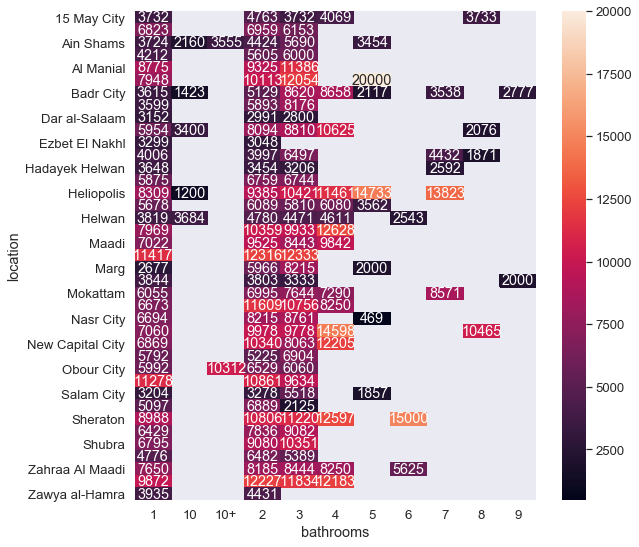

In [203]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [204]:
x=pd.pivot_table(index='location',values='meterprice',columns='payment_option',data=df,aggfunc=np.mean)
x

payment_option                  Cash  Cash or Installment   Installment
location                                                               
15 May City              3795.615385          4567.555556   4659.000000
Abasiya                  6866.207317          6820.857143           NaN
Ain Shams                3930.392822          3477.587156   3898.500000
Al Amiriyyah             4468.750000          6798.666667    300.000000
Al Manial                9089.469880         13928.500000           NaN
Almazah                  9290.919355         12695.000000   6976.666667
Badr City                4944.164557          5007.229911   6474.923077
Basateen                 4400.238095          4928.500000           NaN
Dar al-Salaam            3128.573770          3129.866667   2133.000000
Downtown Cairo           6535.262712          7802.835938  11849.243902
Ezbet El Nakhl           3242.070652          3793.750000           NaN
Gesr Al Suez             4082.930334          3632.603659   5505.105263
Hadayek Helwan           3669.316726          3162.571429   2563.500000
Hadayek al-Kobba         6211.961644          5791.642857   6250.000000
Heliopolis               9859.056424          8418.211039   7152.147239
Helmeyat El Zaytoun      5843.965035          4989.057143   5013.750000
Helwan                   4084.390686          4321.492537   4379.625000
Katameya                 9318.675862         10218.170213  10021.107692
Maadi                    7751.765586          9624.257143  11791.439394
Madinaty                13436.887536          9079.670423   7461.172876
Marg                     3144.071023          3445.176471  10629.500000
Matareya                 3843.920530          3634.818182           NaN
Mokattam                 6779.736140          6866.664975   7227.641509
Mostakbal City           8045.860841         11257.460993  11171.779874
Nasr City                7886.374836          8078.244118  11045.830986
New Cairo - El Tagamoa  10619.258884          8409.070090   9593.102142
New Capital City         8281.591304         10014.051044   9846.276730
New Nozha                5754.970779          4339.333333   6250.000000
Obour City               6389.929889          5998.333333   8089.333333
Rehab City              12608.920810          8179.215652  10764.030303
Salam City               3242.912718          2833.000000   2881.000000
Sayeda Zeinab            5269.613636          6141.666667   3416.500000
Sheraton                10426.457944          9805.259259   6453.416667
Shorouk City             6964.367041          8672.406091   9708.008772
Shubra                   7429.200477          8258.131579   8279.142857
Waili                    5062.311828          5566.555556           NaN
Zahraa Al Maadi          7903.136095          8257.062305   9325.172414
Zamalek                 12101.950000          7208.777778  10185.000000
Zawya al-Hamra           3993.172414          4032.800000           NaN

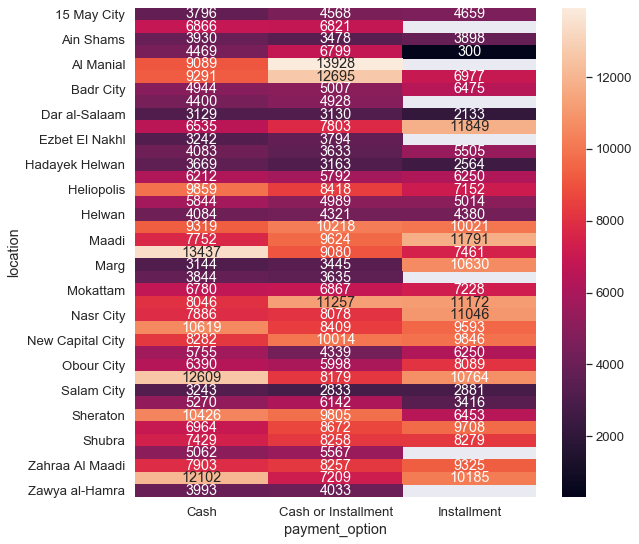

In [205]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [206]:
x=pd.pivot_table(index='location',values='meterprice',columns='delivery_term',data=df,aggfunc=np.mean)
x

delivery_term           Core & Shell      Finished  Not Finished  \
location                                                           
15 May City              3782.450980   3913.378049   3106.500000   
Abasiya                  6759.829787   7310.882353   5245.000000   
Ain Shams                3910.157706   4083.837472   2962.371795   
Al Amiriyyah             4437.783784   4453.187500   5957.000000   
Al Manial                9487.023256   9369.729730   3333.000000   
Almazah                 10231.545455   9302.815789  12500.000000   
Badr City                4284.733913   6067.647525   3736.745968   
Basateen                 4365.518519   4681.266667   4302.333333   
Dar al-Salaam            3081.450000   3349.042254   2764.666667   
Downtown Cairo           6498.594249   8401.088106   5016.130435   
Ezbet El Nakhl           3263.290323   3468.024390   2595.111111   
Gesr Al Suez             4134.705346   4549.986792   2240.081633   
Hadayek Helwan           3800.534247   3895.435484   2482.085106   
Hadayek al-Kobba         6192.882353   6361.220126   4972.055556   
Heliopolis               9305.592545  10202.036053   9545.000000   
Helmeyat El Zaytoun      5659.981982   6064.707317   4834.157895   
Helwan                   4130.850117   4288.208723   3069.101695   
Katameya                10349.109091   8876.813559  10711.285714   
Maadi                    8133.288321   8383.914439   9714.375000   
Madinaty                11389.405172  12087.771973  11424.142857   
Marg                     2623.538462   3718.789773   2064.300000   
Matareya                 3854.978723   3955.620370   3303.214286   
Mokattam                 6713.091787   7180.173423   6868.800000   
Mostakbal City           9801.205521   8802.691892  11688.241379   
Nasr City                6495.168317   8566.961429   9891.216216   
New Cairo - El Tagamoa   7385.700193  10944.557400   9197.523985   
New Capital City         6561.526316  10877.711409   4390.090909   
New Nozha                5630.642458   6662.222222   2753.714286   
Obour City               6595.084211   6475.128205   3909.428571   
Rehab City               7670.374677  12485.374161  11232.909091   
Salam City               3177.754310   3501.594595   2234.448276   
Sayeda Zeinab            5267.108108   5395.653061   4393.500000   
Sheraton                10322.728972  10370.287671   7900.928571   
Shorouk City             7050.330935   8949.139535   3602.600000   
Shubra                   7297.545082   7777.811224   6343.500000   
Waili                    5216.051724   5130.516129   4451.750000   
Zahraa Al Maadi          7742.484444   8395.735593   6668.809524   
Zamalek                 11550.754717  11659.388889           NaN   
Zawya al-Hamra           3700.350000   4600.490566   3151.333333   

delivery_term           Semi Finished  
location                               
15 May City               4044.000000  
Abasiya                   5751.600000  
Ain Shams                 3142.538462  
Al Amiriyyah                      NaN  
Al Manial                 6082.000000  
Almazah                  10149.857143  
Badr City                 5895.022472  
Basateen                  3529.000000  
Dar al-Salaam             2591.900000  
Downtown Cairo            6573.692308  
Ezbet El Nakhl            2496.666667  
Gesr Al Suez              4481.676471  
Hadayek Helwan            2788.862069  
Hadayek al-Kobba          5500.230769  
Heliopolis                7699.165517  
Helmeyat El Zaytoun       5298.384615  
Helwan                    3910.878049  
Katameya                  9495.100503  
Maadi                     9780.220000  
Madinaty                 11213.194444  
Marg                      4892.095238  
Matareya                  3045.857143  
Mokattam                  6132.523490  
Mostakbal City           10830.657143  
Nasr City                 9084.156716  
New Cairo - El Tagamoa   10193.036306  
New Capital City         10092.404444  
New Nozha                 4423.578947  
Obour City 

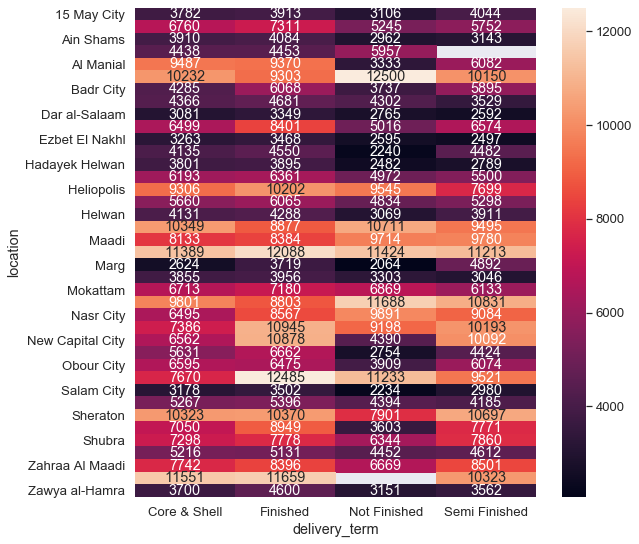

In [207]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [208]:
x=pd.pivot_table(index='location',values='meterprice',columns='delivery_date',data=df,aggfunc=np.mean)
x

delivery_date                   2022          2023          2024  \
location                                                           
15 May City                      NaN           NaN   4214.000000   
Abasiya                          NaN           NaN           NaN   
Ain Shams                3798.444444           NaN           NaN   
Al Amiriyyah                     NaN           NaN           NaN   
Al Manial               15789.000000           NaN           NaN   
Almazah                 11960.500000  11781.000000   5724.500000   
Badr City                4828.633333   4746.571429   6798.949153   
Basateen                         NaN           NaN           NaN   
Dar al-Salaam            3500.000000           NaN           NaN   
Downtown Cairo           6393.222222  12658.666667  14570.166667   
Ezbet El Nakhl           2564.000000           NaN           NaN   
Gesr Al Suez             3609.947368   5865.000000   6520.000000   
Hadayek Helwan           2784.666667           NaN           NaN   
Hadayek al-Kobba         5747.500000           NaN   6390.000000   
Heliopolis               9115.500000   7383.551724   7248.484375   
Helmeyat El Zaytoun      4272.666667           NaN           NaN   
Helwan                   3905.818182   4435.333333   2692.000000   
Katameya                 7247.166667  10315.923077  10744.434783   
Maadi                    8132.000000   8628.416667  10214.571429   
Madinaty                13732.625000   6112.285714   8203.583333   
Marg                     5446.000000           NaN  13489.500000   
Matareya                 3567.600000   4411.000000           NaN   
Mokattam                 7108.090909   7330.352941  11666.000000   
Mostakbal City          10668.903226  10746.523810  12759.811321   
Nasr City               11742.230769  13127.272727  14439.222222   
New Cairo - El Tagamoa   8959.987288   8025.546642   8668.442186   
New Capital City        10671.466667  10247.583333  10174.201550   
New Nozha                9395.000000           NaN   7333.000000   
Obour City               6146.142857   7235.600000   6257.400000   
Rehab City              10361.000000   9928.666667   9500.408163   
Salam City               3274.666667           NaN           NaN   
Sayeda Zeinab            5000.000000           NaN           NaN   
Sheraton                10588.000000   4366.285714   1000.000000   
Shorouk City             7235.823529  15035.052632   9045.428571   
Shubra                   7000.000000  11695.000000           NaN   
Waili                    5000.000000           NaN   7647.000000   
Zahraa Al Maadi          6825.000000   9172.462500   8293.076190   
Zamalek                  8048.800000  12637.000000   7654.500000   
Zawya al-Hamra           3923.000000           NaN           NaN   

delivery_date                   2025          2026     2027    2028     2030  \
location                                                                       
15 May City                      NaN           NaN      NaN     NaN      NaN   
Abasiya                  6000.000000           NaN      NaN     NaN      NaN   
Ain Shams                4500.000000   3793.000000      NaN     NaN      NaN   
Al Amiriyyah                     NaN           NaN      NaN     NaN      NaN   
Al Manial                        NaN           NaN      NaN     NaN      NaN   
Almazah                          NaN           NaN      NaN     NaN      NaN   
Badr City                4627.571429   5750.000000      NaN     NaN      NaN   
Basateen                         NaN           NaN      NaN     NaN      NaN   
Dar al-Salaam                    NaN           NaN      NaN     NaN      NaN   
Downtown Cairo           7888.333333           NaN  19230.0     NaN      NaN   
Ezbet El Nakhl                   NaN           NaN      NaN     NaN      NaN   
Gesr Al Suez             4191.500000           NaN      NaN     NaN      NaN   
Hadayek Helwan                   NaN           NaN      NaN     NaN      NaN   
Hadayek al-

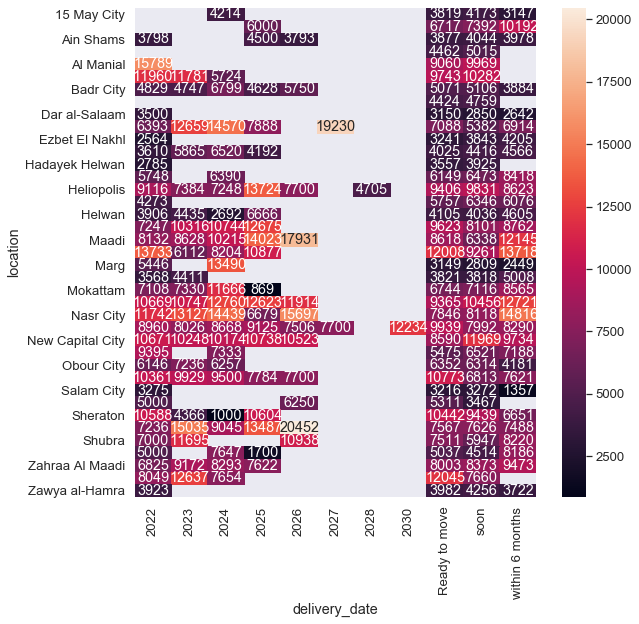

In [209]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [210]:
x=pd.pivot_table(index='location',values='meterprice',columns='electricity_meter',data=df,aggfunc=np.mean)
x

electricity_meter                  0             1
location                                          
15 May City              3875.638298   3807.252525
Abasiya                  6814.810811   6896.673077
Ain Shams                3785.675456   3965.270400
Al Amiriyyah             4695.333333   4395.488889
Al Manial                8432.190476   9956.534884
Almazah                  9163.194444  10344.697674
Badr City                4595.988935   5442.585848
Basateen                 4134.473684   4665.518519
Dar al-Salaam            3003.704545   3218.774775
Downtown Cairo           6505.148551   7599.465753
Ezbet El Nakhl           3229.600000   3298.793893
Gesr Al Suez             3882.508346   4177.437916
Hadayek Helwan           3298.020619   3918.625000
Hadayek al-Kobba         5928.260563   6325.273810
Heliopolis               9263.255086   9346.567073
Helmeyat El Zaytoun      5605.413502   5906.248663
Helwan                   3918.256614   4256.829787
Katameya                10077.632184   9209.736170
Maadi                    7926.461017   9344.191099
Madinaty                10832.172414  12943.955727
Marg                     2836.493590   3526.755760
Matareya                 3831.854430   3827.692771
Mokattam                 6949.084229   6699.207207
Mostakbal City          10158.618257   9801.298625
Nasr City                7673.111111   8375.228869
New Cairo - El Tagamoa  10087.233598   9299.723514
New Capital City        10152.431034   9468.568710
New Nozha                5286.830769   5725.907489
Obour City               6115.350000   6482.973214
Rehab City               9346.306905  10845.330617
Salam City               3201.154321   3225.801498
Sayeda Zeinab            5093.129032   5340.274194
Sheraton                10295.536481  10281.397436
Shorouk City             7653.539877   8258.159036
Shubra                   7483.241026   7529.241636
Waili                    5839.142857   4724.238806
Zahraa Al Maadi          8065.869725   8178.901670
Zamalek                 11646.000000  11316.717391
Zawya al-Hamra           3895.611111   4050.114583

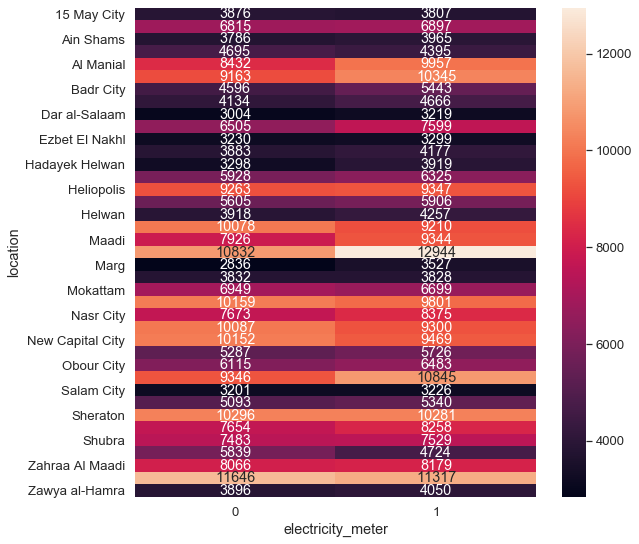

In [211]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [212]:
x=pd.pivot_table(index='location',values='meterprice',columns='balcony',data=df,aggfunc=np.mean)
x

balcony                            0             1
location                                          
15 May City              3667.229008   4206.790323
Abasiya                  7007.333333   6714.659091
Ain Shams                3763.742857   4065.657837
Al Amiriyyah             4385.260000   4786.727273
Al Manial                8898.608696   9562.743590
Almazah                  9152.114286  10326.659091
Badr City                4536.911557   5629.095694
Basateen                 4156.750000   4896.388889
Dar al-Salaam            3025.872483   3415.100000
Downtown Cairo           6175.021148   8146.109677
Ezbet El Nakhl           3317.084034   3212.116883
Gesr Al Suez             3838.640135   4338.647235
Hadayek Helwan           3360.807512   3906.729323
Hadayek al-Kobba         5848.771574   6515.604061
Heliopolis               9421.384146   9240.759049
Helmeyat El Zaytoun      5673.397727   5947.428571
Helwan                   3901.494929   4389.785915
Katameya                 9160.867521  10117.965649
Maadi                    7622.573643   9406.116945
Madinaty                12722.703189  11632.236609
Marg                     2725.842105   4043.496552
Matareya                 3786.640187   3913.536364
Mokattam                 6484.706186   7110.844237
Mostakbal City           7543.421941  11012.274854
Nasr City                7774.304348   8296.795285
New Cairo - El Tagamoa   9643.368244   9633.554254
New Capital City         9925.617486   9612.277778
New Nozha                5392.246154   5775.191358
Obour City               6228.809524   6417.972350
Rehab City               9738.953947  10581.292812
Salam City               3282.410072   3095.139073
Sayeda Zeinab            5457.684211   4941.555556
Sheraton                10065.064103  10512.798283
Shorouk City             6824.645161   8550.456265
Shubra                   7335.051181   7721.404762
Waili                    4857.464286   5410.347826
Zahraa Al Maadi          7886.409009   8369.319471
Zamalek                 11764.162162  11320.683333
Zawya al-Hamra           4058.510870   3892.948276

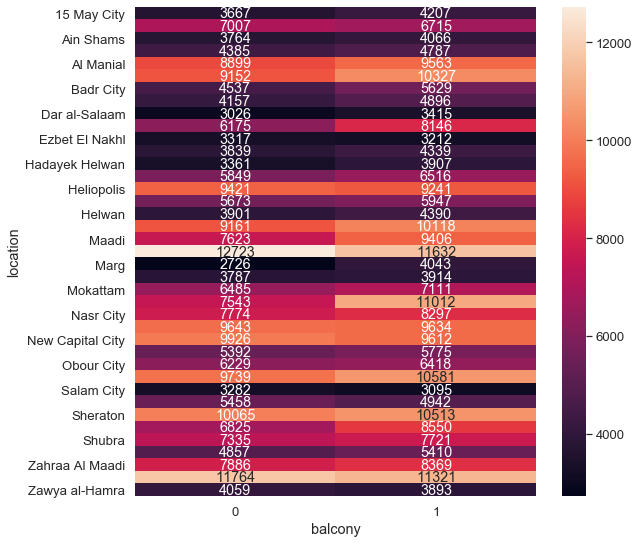

In [213]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [214]:
x=pd.pivot_table(index='location',values='meterprice',columns='water_meter',data=df,aggfunc=np.mean)
x

water_meter                        0             1
location                                          
15 May City              3799.407080   3898.687500
Abasiya                  6767.836735   6978.775000
Ain Shams                3826.219002   3960.865191
Al Amiriyyah             4604.512821   4393.787879
Al Manial                8740.865385   9932.060606
Almazah                 10159.523810   9405.324324
Badr City                4606.524882   5553.950000
Basateen                 4366.230769   4550.100000
Dar al-Salaam            2967.049020   3288.360825
Downtown Cairo           6649.524096   7642.666667
Ezbet El Nakhl           3254.608696   3294.634615
Gesr Al Suez             3913.365476   4215.527046
Hadayek Helwan           3326.046243   3815.265896
Hadayek al-Kobba         5999.911917   6357.208955
Heliopolis               9423.956579   9216.726535
Helmeyat El Zaytoun      5629.336667   5944.112540
Helwan                   3995.084362   4254.696133
Katameya                 9540.136364   9838.433333
Maadi                    7914.616564   9480.404558
Madinaty                10922.627326  12849.666826
Marg                     2809.616667   3637.658031
Matareya                 3767.042781   3915.277372
Mokattam                 6847.621777   6767.340304
Mostakbal City          10268.961864   9754.110895
Nasr City                7847.336134   8327.835244
New Cairo - El Tagamoa   9938.434775   9387.144856
New Capital City         9955.780591   9560.848291
New Nozha                5392.610811   5752.534884
Obour City               6073.042683   6561.780000
Rehab City               9477.081340  10828.275240
Salam City               3155.901345   3282.087379
Sayeda Zeinab            5228.136364   5284.612245
Sheraton                10382.207547  10165.455446
Shorouk City             7262.034653   8531.202128
Shubra                   7490.265560   7531.139013
Waili                    5439.460000   4786.942308
Zahraa Al Maadi          8008.745066   8266.827731
Zamalek                 11442.581818  11551.738095
Zawya al-Hamra           3906.126761   4073.911392

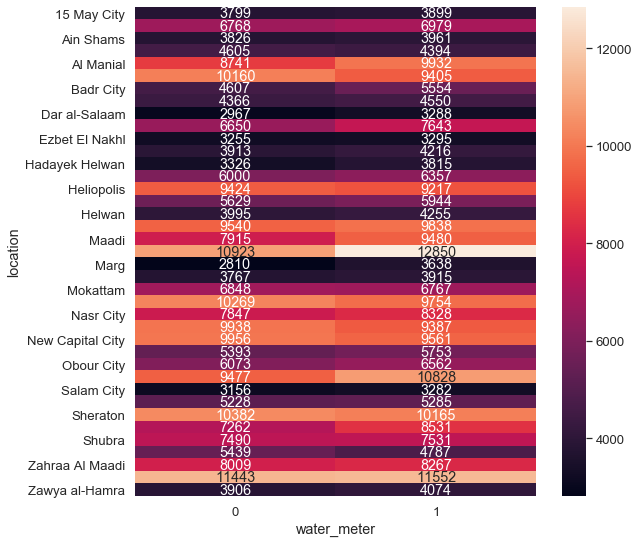

In [215]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [216]:
x=pd.pivot_table(index='location',values='meterprice',columns='elevator',data=df,aggfunc=np.mean)
x

elevator                           0             1
location                                          
15 May City              3754.467033   5265.000000
Abasiya                  6465.720000   7371.512821
Ain Shams                3634.227709   4358.046272
Al Amiriyyah             4195.315789   5695.866667
Al Manial                8099.982456  11449.428571
Almazah                  9448.184211  10138.195122
Badr City                4331.150450   7063.401302
Basateen                 3796.093750   5932.071429
Dar al-Salaam            3021.417910   3334.461538
Downtown Cairo           6093.149584   8462.853571
Ezbet El Nakhl           3143.760563   3623.185185
Gesr Al Suez             3859.541136   4292.031519
Hadayek Helwan           3631.713568   3488.000000
Hadayek al-Kobba         5721.853774   6718.401099
Heliopolis               9298.673157   9325.769912
Helmeyat El Zaytoun      5533.288184   6126.397727
Helwan                   3919.670989   4603.350649
Katameya                 9263.957529  10106.265823
Maadi                    7651.803571   9484.337531
Madinaty                11194.025563  12576.430345
Marg                     2696.523810   4716.480000
Matareya                 3753.497835   4019.053763
Mokattam                 6567.775596   7155.454012
Mostakbal City           9331.224066  10193.051081
Nasr City                7711.637532   8341.826752
New Cairo - El Tagamoa   9998.873867   9307.277171
New Capital City         9774.388128   9657.213992
New Nozha                5440.668478   5699.341040
Obour City               5999.894737   7062.914530
Rehab City              10414.468750  10357.465228
Salam City               3209.224181   3306.687500
Sayeda Zeinab            4741.846154   6455.857143
Sheraton                10168.019685  10432.065728
Shorouk City             7415.649402   8603.470948
Shubra                   6895.708609   8654.901235
Waili                    4776.413793   5542.318182
Zahraa Al Maadi          7867.557692   8356.732270
Zamalek                 10997.535714  12162.268293
Zawya al-Hamra           3851.825397   4743.500000

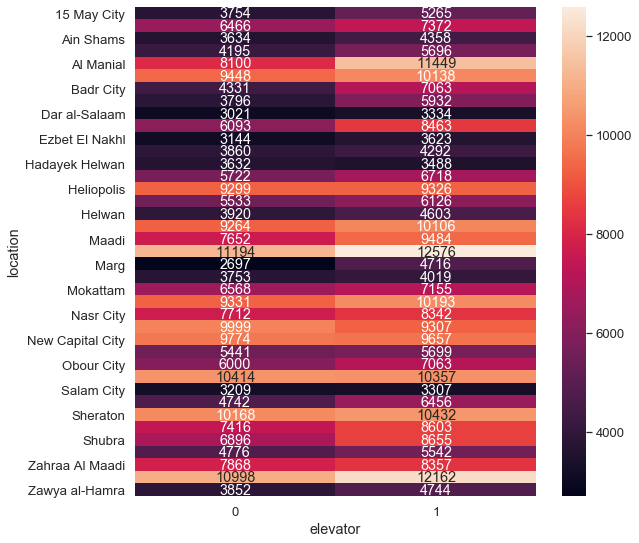

In [217]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [218]:
x=pd.pivot_table(index='location',values='meterprice',columns='security',data=df,aggfunc=np.mean)
x

security                           0             1
location                                          
15 May City              3828.822581   4152.428571
Abasiya                  6842.402985   6924.272727
Ain Shams                3756.702041   4804.811594
Al Amiriyyah             4496.014493   4782.000000
Al Manial                8905.753623  10486.625000
Almazah                  8815.000000  10990.333333
Badr City                4452.561667   6632.543388
Basateen                 4159.976190   7451.250000
Dar al-Salaam            3110.038043   3290.866667
Downtown Cairo           6255.117371   8858.353488
Ezbet El Nakhl           3254.462366   3673.600000
Gesr Al Suez             3844.467409   4918.422442
Hadayek Helwan           3559.487889   3627.280702
Hadayek al-Kobba         6002.109589   6697.705882
Heliopolis               9254.433263   9396.254786
Helmeyat El Zaytoun      5693.776549   6061.842767
Helwan                   3992.901774   4826.208696
Katameya                 8957.215613  10506.867841
Maadi                    7277.025547   9711.866005
Madinaty                12593.943833  11790.453265
Marg                     2717.413043   6525.333333
Matareya                 3825.506803   3871.033333
Mokattam                 6462.902081   7516.142506
Mostakbal City           9263.555556  10059.362602
Nasr City                7390.408088   8774.252381
New Cairo - El Tagamoa   9599.494583   9665.307018
New Capital City        10194.943396   9547.620879
New Nozha                5449.301471   5939.517647
Obour City               5967.099099   6927.035211
Rehab City               9457.722045  10683.327641
Salam City               3197.205379   3610.950000
Sayeda Zeinab            5173.595238   6044.666667
Sheraton                10182.673352  10601.305085
Shorouk City             6366.545455   9233.403458
Shubra                   7158.183673   9424.861111
Waili                    5061.870588   5331.470588
Zahraa Al Maadi          7727.790774   8623.811321
Zamalek                 11601.574468  11384.820000
Zawya al-Hamra           3932.861314   4644.000000

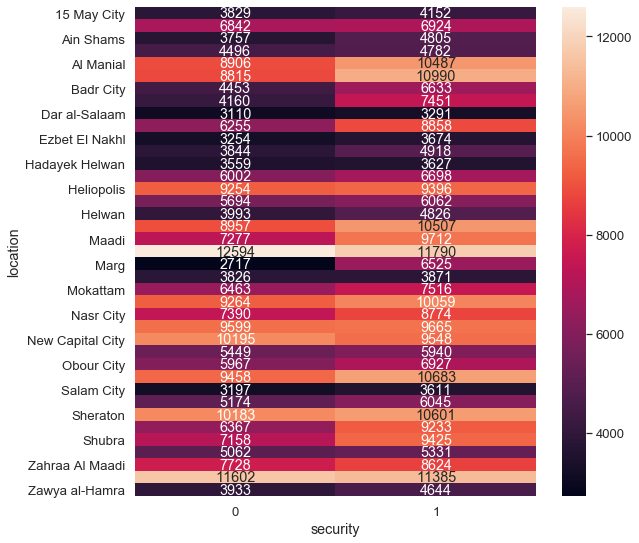

In [219]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [220]:
x=pd.pivot_table(index='location',values='meterprice',columns='natural_gas',data=df,aggfunc=np.mean)
x

natural_gas                        0             1
location                                          
15 May City              3762.890244   3897.936937
Abasiya                  6606.297297   7045.038462
Ain Shams                3694.719723   4090.896296
Al Amiriyyah             4764.551724   4334.860465
Al Manial                8956.268293   9433.545455
Almazah                  9016.562500  10343.978723
Badr City                4613.632296   5808.553354
Basateen                 3968.080000   5015.333333
Dar al-Salaam            3074.565657   3172.280000
Downtown Cairo           6798.996835   7448.440000
Ezbet El Nakhl           3127.406250   3347.818182
Gesr Al Suez             3695.409211   4392.148564
Hadayek Helwan           3169.184971   3972.127168
Hadayek al-Kobba         5653.913669   6470.149020
Heliopolis               8618.982097   9959.807372
Helmeyat El Zaytoun      5410.743902   6044.868493
Helwan                   3955.936170   4225.379237
Katameya                 9692.247492   9627.248731
Maadi                    8107.835962   9271.119444
Madinaty                11398.513823  12692.696512
Marg                     2882.194805   3488.315068
Matareya                 3690.964286   3979.153846
Mokattam                 6877.816189   6752.323296
Mostakbal City           9911.632867   9918.881466
Nasr City                7670.596698   8394.437333
New Cairo - El Tagamoa   9794.225004   9478.286003
New Capital City         9305.573427   9958.479714
New Nozha                4818.993289   6101.149038
Obour City               5959.575758   6797.222892
Rehab City               9581.687885  10883.699869
Salam City               3150.760563   3249.017422
Sayeda Zeinab            4918.162162   5482.357143
Sheraton                10216.443478  10358.333333
Shorouk City             7186.206081   9033.851064
Shubra                   7373.340426   7602.934783
Waili                    5156.888889   5067.263158
Zahraa Al Maadi          7834.739057   8470.391837
Zamalek                 11038.666667  11990.065217
Zawya al-Hamra           3775.190476   4153.298851

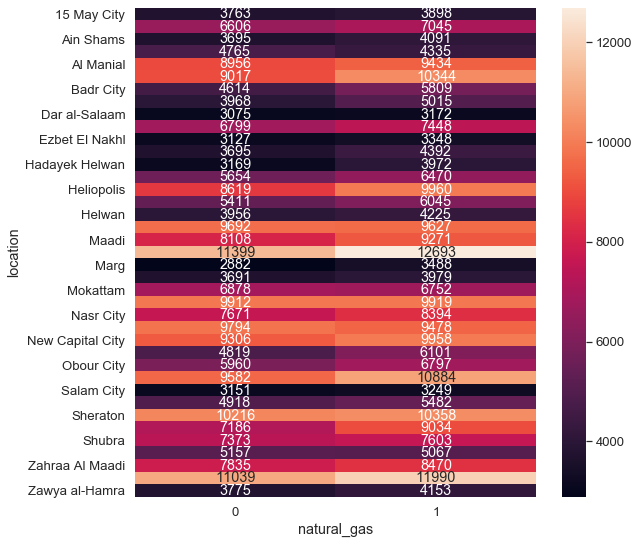

In [221]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [222]:
x=pd.pivot_table(index='location',values='meterprice',columns='landline',data=df,aggfunc=np.mean)
x

landline                           0             1
location                                          
15 May City              3837.712329   3849.404255
Abasiya                  6922.345455   6766.058824
Ain Shams                3730.528325   4298.833333
Al Amiriyyah             4508.375000   4507.041667
Al Manial                8533.472727  10431.400000
Almazah                 10150.043478   9327.121212
Badr City                4658.172926   6404.137931
Basateen                 3784.027778   6829.900000
Dar al-Salaam            3060.862745   3332.565217
Downtown Cairo           6652.281755   8119.173077
Ezbet El Nakhl           3175.408451   3539.962963
Gesr Al Suez             3777.491480   4741.522422
Hadayek Helwan           3439.170124   3872.447619
Hadayek al-Kobba         5921.103139   6522.666667
Heliopolis               8971.056764   9953.772085
Helmeyat El Zaytoun      5538.809917   6156.580645
Helwan                   3968.310400   4491.556054
Katameya                 9575.153392   9863.522293
Maadi                    8076.842667   9533.016556
Madinaty                11430.389934  12674.060875
Marg                     2888.116788   4206.616162
Matareya                 3794.204819   3947.640000
Mokattam                 6753.954600   6941.087855
Mostakbal City           9790.114754  10036.213542
Nasr City                7527.462312   8759.559792
New Cairo - El Tagamoa   9765.486184   9427.352462
New Capital City         9383.327731  10011.922414
New Nozha                5033.834025   6671.681034
Obour City               6054.247934   6911.532787
Rehab City               9876.620415  10879.460674
Salam City               3121.212219   3467.618644
Sayeda Zeinab            5097.016949   5537.058824
Sheraton                10088.279720  10604.745856
Shorouk City             7384.016667   9249.619266
Shubra                   7349.343849   7856.163265
Waili                    4707.046154   5809.081081
Zahraa Al Maadi          7783.797222   8791.189560
Zamalek                 11942.160714  10872.048780
Zawya al-Hamra           3831.009709   4352.765957

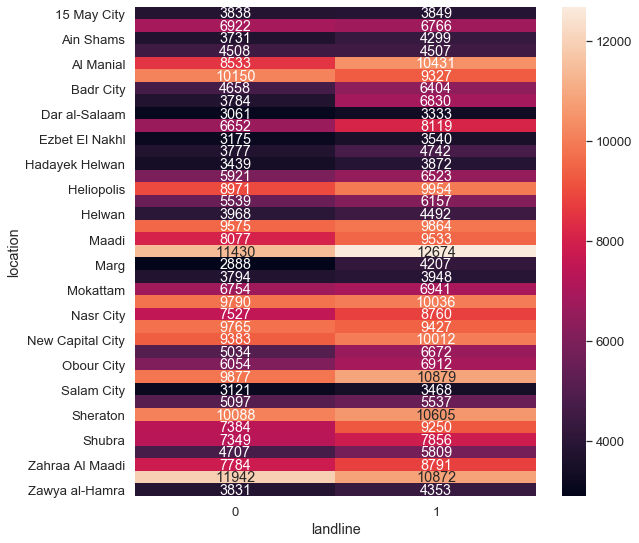

In [223]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [224]:
x=pd.pivot_table(index='location',values='meterprice',columns='private_garden',data=df,aggfunc=np.mean)
x

private_garden                     0             1
location                                          
15 May City              3831.850267   4112.000000
Abasiya                  6922.279070   5153.000000
Ain Shams                3882.759058   4147.571429
Al Amiriyyah             4486.343284   4797.200000
Al Manial                9303.621951   6462.000000
Almazah                  9627.367647  10912.363636
Badr City                4780.569455   6407.579288
Basateen                 4446.173913           NaN
Dar al-Salaam            3123.668342           NaN
Downtown Cairo           6582.377020  10748.119048
Ezbet El Nakhl           3275.846939           NaN
Gesr Al Suez             4020.998066   9005.400000
Hadayek Helwan           3544.362832   4844.000000
Hadayek al-Kobba         6177.090674   6428.125000
Heliopolis               9227.212620  10078.581818
Helmeyat El Zaytoun      5806.894215   4041.500000
Helwan                   4058.393162   5447.827586
Katameya                 9555.487535   9963.103704
Maadi                    8380.930851  10450.814159
Madinaty                11348.205287  12533.534804
Marg                     2843.370370   9535.272727
Matareya                 3836.160991   1750.000000
Mokattam                 6768.833787   7209.552846
Mostakbal City           9266.757322  11057.272059
Nasr City                7718.282427   9951.756881
New Cairo - El Tagamoa   9659.919088   9576.148096
New Capital City         9229.424883  10402.372760
New Nozha                5486.583333   8637.555556
Obour City               6258.591216   6702.823529
Rehab City               9896.700621  11244.271910
Salam City               3181.239808   4441.583333
Sayeda Zeinab            5242.586957   6666.000000
Sheraton                10195.997712  11635.200000
Shorouk City             7506.963218   9854.083916
Shubra                   7515.028698   7299.090909
Waili                    5040.858586   7283.000000
Zahraa Al Maadi          8058.014862   8547.021127
Zamalek                 11967.702381   8402.153846
Zawya al-Hamra           3994.671141   3968.000000

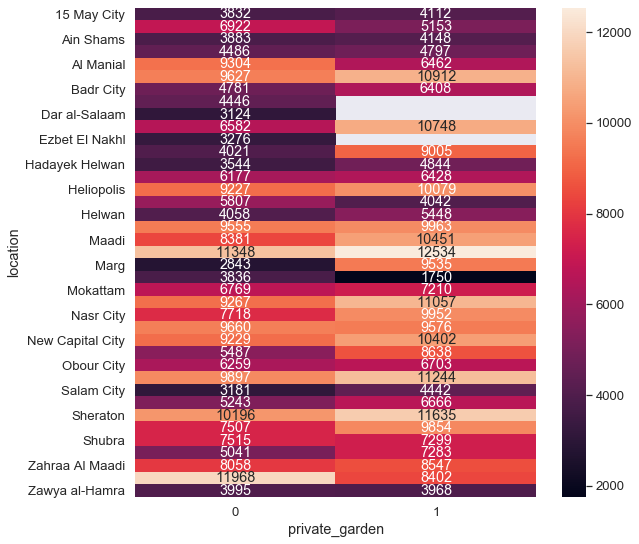

In [225]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [226]:
x=pd.pivot_table(index='location',values='meterprice',columns='pets_allowed',data=df,aggfunc=np.mean)
x

pets_allowed                       0             1
location                                          
15 May City              3833.739130   3980.000000
Abasiya                  6807.512500   7352.666667
Ain Shams                3824.285988   4733.236842
Al Amiriyyah             4503.102941   4590.000000
Al Manial                8746.138889  11735.461538
Almazah                  9227.155172  11405.809524
Badr City                4574.458015   6846.751337
Basateen                 4358.232558   5706.666667
Dar al-Salaam            3119.637306   3253.333333
Downtown Cairo           6455.589537   9449.986111
Ezbet El Nakhl           3268.155914   3418.900000
Gesr Al Suez             3934.840112   5300.296296
Hadayek Helwan           3534.053125   4021.153846
Hadayek al-Kobba         6068.612069   7041.413043
Heliopolis               9602.146654   8722.368421
Helmeyat El Zaytoun      5780.710476   5843.569767
Helwan                   4066.755668   4681.611111
Katameya                 9041.970501  11014.789809
Maadi                    7750.625323  10028.603448
Madinaty                11541.572414  12662.931909
Marg                     2760.085366   6722.022222
Matareya                 3826.533762   3906.000000
Mokattam                 6588.094818   7456.968454
Mostakbal City           8924.860870  10354.557692
Nasr City                7700.090041   8852.596372
New Cairo - El Tagamoa   9644.057977   9629.330531
New Capital City         9675.000000   9704.554054
New Nozha                5361.246835   7144.268293
Obour City               6248.874046   6579.705882
Rehab City              10199.822134  10496.552419
Salam City               3208.546569   3370.904762
Sayeda Zeinab            5283.471264   4887.000000
Sheraton                10244.724490  10517.000000
Shorouk City             6727.973485   9230.821656
Shubra                   7397.069212   8560.577778
Waili                    4924.483516   6615.090909
Zahraa Al Maadi          7958.467532   8706.772152
Zamalek                 11369.693548  11702.685714
Zawya al-Hamra           4023.202899   3664.333333

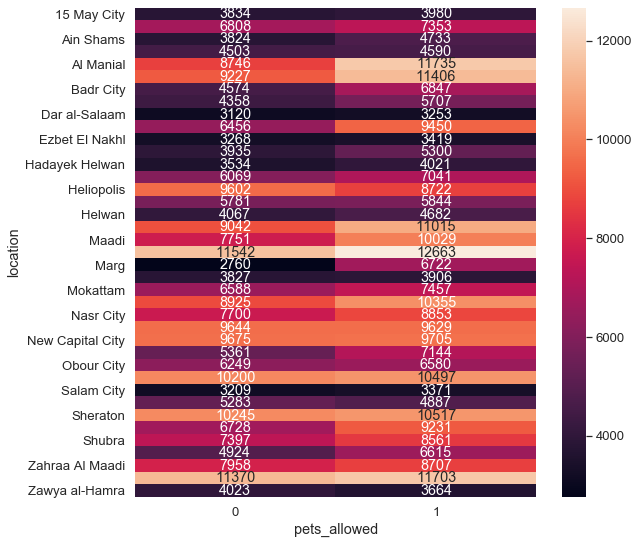

In [227]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [228]:
x=pd.pivot_table(index='location',values='meterprice',columns='covered_parking',data=df,aggfunc=np.mean)
x

covered_parking                    0             1
location                                          
15 May City              3805.655914   4768.000000
Abasiya                  6821.256098   7347.428571
Ain Shams                3839.128492   5032.000000
Al Amiriyyah             4479.200000   5513.500000
Al Manial                9092.229730   9950.727273
Almazah                  8965.892857  11852.478261
Badr City                4609.758837   6532.851582
Basateen                 4230.181818   9198.000000
Dar al-Salaam            3124.076531   3097.000000
Downtown Cairo           6301.349076   9743.305195
Ezbet El Nakhl           3273.603093   3493.500000
Gesr Al Suez             3917.703297   5928.057143
Hadayek Helwan           3537.640244   4172.277778
Hadayek al-Kobba         6076.699717   7090.414634
Heliopolis               9663.402597   8622.190826
Helmeyat El Zaytoun      5709.793169   6289.988095
Helwan                   4001.544872   5303.029412
Katameya                 9170.591592  10679.404908
Maadi                    7871.563492   9807.143813
Madinaty                11738.485378  12521.593249
Marg                     2785.734104   9034.629630
Matareya                 3812.480645   4211.500000
Mokattam                 6577.410618   7535.916944
Mostakbal City           8664.679856  10653.192797
Nasr City                7677.276411   8785.016563
New Cairo - El Tagamoa   9797.683013   9459.003911
New Capital City        10144.172897   9497.238289
New Nozha                5467.383929   7144.190476
Obour City               6215.738806   6692.885417
Rehab City              10921.505515   9956.439093
Salam City               3205.228365   3577.000000
Sayeda Zeinab            5252.000000   5800.000000
Sheraton                10024.520776  11187.311321
Shorouk City             7352.026923   8689.106918
Shubra                   7299.205543  10452.967742
Waili                    5004.033708   5810.384615
Zahraa Al Maadi          7668.470247   8913.293671
Zamalek                 12117.637681   9942.785714
Zawya al-Hamra           3934.958042   5210.714286

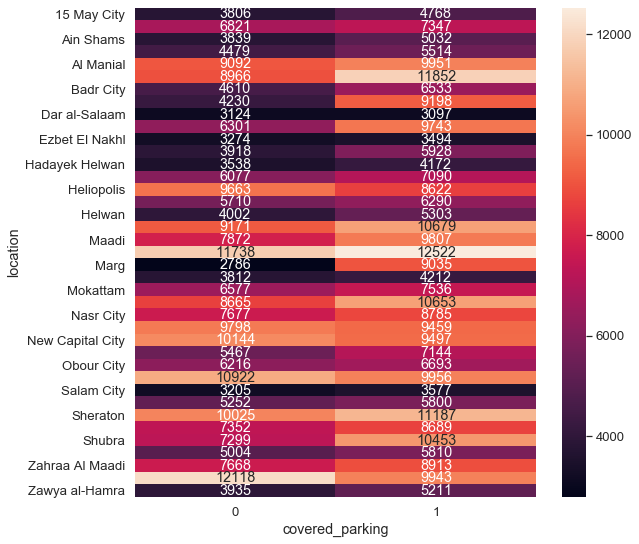

In [229]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [230]:
x=pd.pivot_table(index='location',values='meterprice',columns='private_garden',data=df,aggfunc=np.mean)
x

private_garden                     0             1
location                                          
15 May City              3831.850267   4112.000000
Abasiya                  6922.279070   5153.000000
Ain Shams                3882.759058   4147.571429
Al Amiriyyah             4486.343284   4797.200000
Al Manial                9303.621951   6462.000000
Almazah                  9627.367647  10912.363636
Badr City                4780.569455   6407.579288
Basateen                 4446.173913           NaN
Dar al-Salaam            3123.668342           NaN
Downtown Cairo           6582.377020  10748.119048
Ezbet El Nakhl           3275.846939           NaN
Gesr Al Suez             4020.998066   9005.400000
Hadayek Helwan           3544.362832   4844.000000
Hadayek al-Kobba         6177.090674   6428.125000
Heliopolis               9227.212620  10078.581818
Helmeyat El Zaytoun      5806.894215   4041.500000
Helwan                   4058.393162   5447.827586
Katameya                 9555.487535   9963.103704
Maadi                    8380.930851  10450.814159
Madinaty                11348.205287  12533.534804
Marg                     2843.370370   9535.272727
Matareya                 3836.160991   1750.000000
Mokattam                 6768.833787   7209.552846
Mostakbal City           9266.757322  11057.272059
Nasr City                7718.282427   9951.756881
New Cairo - El Tagamoa   9659.919088   9576.148096
New Capital City         9229.424883  10402.372760
New Nozha                5486.583333   8637.555556
Obour City               6258.591216   6702.823529
Rehab City               9896.700621  11244.271910
Salam City               3181.239808   4441.583333
Sayeda Zeinab            5242.586957   6666.000000
Sheraton                10195.997712  11635.200000
Shorouk City             7506.963218   9854.083916
Shubra                   7515.028698   7299.090909
Waili                    5040.858586   7283.000000
Zahraa Al Maadi          8058.014862   8547.021127
Zamalek                 11967.702381   8402.153846
Zawya al-Hamra           3994.671141   3968.000000

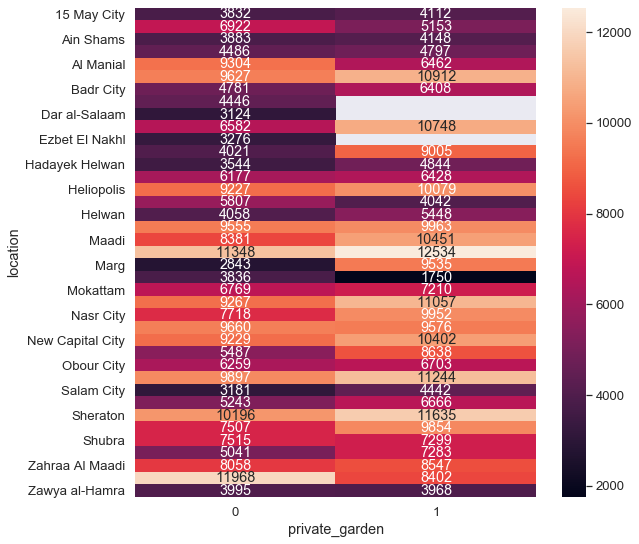

In [231]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [232]:
x=pd.pivot_table(index='location',values='meterprice',columns='pool',data=df,aggfunc=np.mean)
x

pool                               0             1
location                                          
15 May City              3837.125000   4500.000000
Abasiya                  6862.640449           NaN
Ain Shams                3884.005381   4655.333333
Al Amiriyyah             4507.930556           NaN
Al Manial                9245.928571   5625.000000
Almazah                  9280.455882  13056.909091
Badr City                4821.066584  11829.919355
Basateen                 4396.844444   6666.000000
Dar al-Salaam            3123.668342           NaN
Downtown Cairo           6860.174740   9588.015873
Ezbet El Nakhl           3275.846939           NaN
Gesr Al Suez             4005.564881  10166.833333
Hadayek Helwan           3570.656069           NaN
Hadayek al-Kobba         6169.086735   8750.000000
Heliopolis               9164.538667  11133.609756
Helmeyat El Zaytoun      5798.703947   3936.000000
Helwan                   4101.612559   5012.500000
Katameya                 9090.215426  11471.908333
Maadi                    7615.884848  11746.835165
Madinaty                12077.233756  10112.940860
Marg                     2888.835694   9402.000000
Matareya                 3829.722222           NaN
Mokattam                 6714.688601   7545.600000
Mostakbal City           8585.079186  11826.243506
Nasr City                7608.100524  10422.031963
New Cairo - El Tagamoa   9349.651751  10806.081768
New Capital City         8798.692708  10764.171340
New Nozha                5531.564972   9631.666667
Obour City               6266.679525   7276.444444
Rehab City              10105.519637  11423.206226
Salam City               3221.007009   1285.000000
Sayeda Zeinab            5257.892473           NaN
Sheraton                10308.495495   9901.521739
Shorouk City             7467.328294  10585.130435
Shubra                   7487.948052  12583.000000
Waili                    5052.639175   6157.600000
Zahraa Al Maadi          7922.336179   9395.224490
Zamalek                 11470.034091  11683.555556
Zawya al-Hamra           3994.493333           NaN

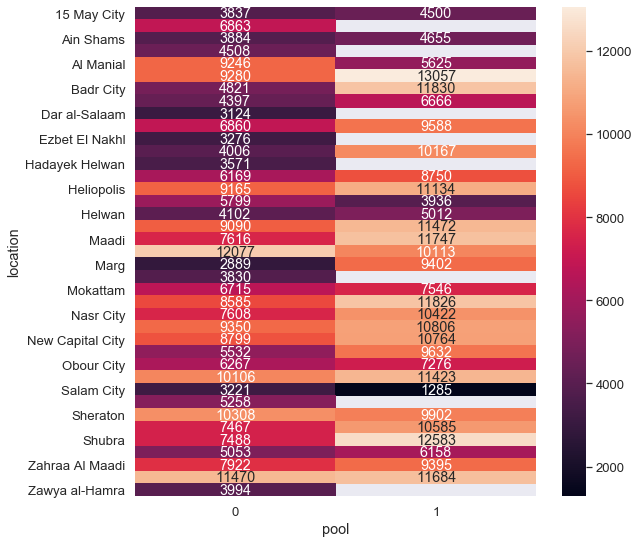

In [233]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [234]:
x=pd.pivot_table(index='location',values='meterprice',columns='maids_room',data=df,aggfunc=np.mean)
x

maids_room                         0             1
location                                          
15 May City              3840.559585           NaN
Abasiya                  6857.848837   7000.000000
Ain Shams                3882.828520   4245.800000
Al Amiriyyah             4507.930556           NaN
Al Manial                9203.329412           NaN
Almazah                  9486.521739  12012.700000
Badr City                4883.580665   8501.989011
Basateen                 4454.088889   4090.000000
Dar al-Salaam            3127.923469   2845.666667
Downtown Cairo           6969.810903   8850.870370
Ezbet El Nakhl           3275.846939           NaN
Gesr Al Suez             4025.141639   5230.027778
Hadayek Helwan           3554.470588   4487.833333
Hadayek al-Kobba         6170.246787   7111.200000
Heliopolis               9123.874491  11192.288591
Helmeyat El Zaytoun      5793.166942   5425.666667
Helwan                   4086.354916   5270.785714
Katameya                 9545.635371  11122.342105
Maadi                    8283.209184  11654.606742
Madinaty                11974.391880  12075.099631
Marg                     3007.610644   8380.125000
Matareya                 3844.748447   1410.500000
Mokattam                 6708.615315   7830.684211
Mostakbal City           9155.285178  11784.889401
Nasr City                7937.276062   9602.485507
New Cairo - El Tagamoa   9429.376703  10717.861590
New Capital City         9341.682635  10557.911765
New Nozha                5538.005714   6966.714286
Obour City               6290.510086   7384.000000
Rehab City              10335.187500  10548.247934
Salam City               3219.142523   2083.000000
Sayeda Zeinab            5257.892473           NaN
Sheraton                10224.687500  11791.947368
Shorouk City             7730.379877   9999.648352
Shubra                   7428.208791  11640.333333
Waili                    5078.510000   6521.500000
Zahraa Al Maadi          8063.391608   8829.783133
Zamalek                 11549.858824  11064.750000
Zawya al-Hamra           3994.493333           NaN

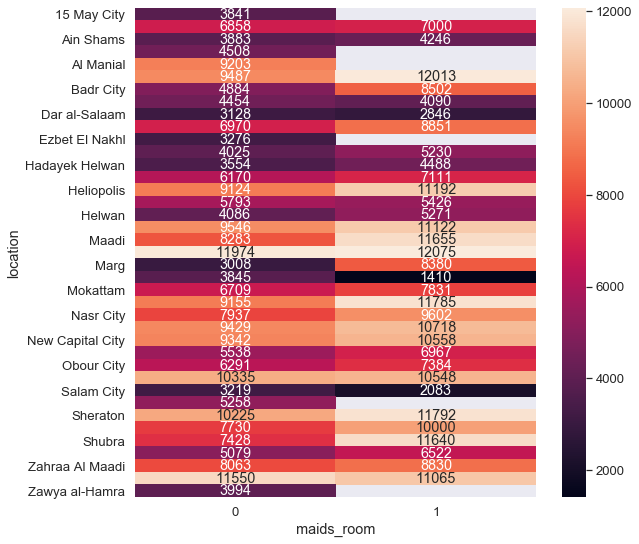

In [235]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [236]:
x=pd.pivot_table(index='location',values='meterprice',columns='central_ac_heating',data=df,aggfunc=np.mean)
x

central_ac_heating                 0             1
location                                          
15 May City              3842.291667   3508.000000
Abasiya                  6834.647059   7457.500000
Ain Shams                3868.802727   4941.611111
Al Amiriyyah             4481.695652   5111.333333
Al Manial                9081.525000  11152.200000
Almazah                  9117.507692  13004.214286
Badr City                4890.006753  10680.072727
Basateen                 4446.173913           NaN
Dar al-Salaam            3123.668342           NaN
Downtown Cairo           6837.450172   9997.118644
Ezbet El Nakhl           3277.615385   2931.000000
Gesr Al Suez             3973.163696   6679.978261
Hadayek Helwan           3557.258721   5875.000000
Hadayek al-Kobba         6156.277487   7007.000000
Heliopolis               9042.082923  11246.790000
Helmeyat El Zaytoun      5775.559122   6225.736842
Helwan                   4105.640625   4119.875000
Katameya                 9406.022472  11938.627451
Maadi                    8122.230769  11588.644068
Madinaty                11970.542690  12149.978632
Marg                     2976.204545   7627.380952
Matareya                 3809.636364   5111.200000
Mokattam                 6633.540390   8128.829932
Mostakbal City           9304.109375  11942.074713
Nasr City                7840.160839   9827.514451
New Cairo - El Tagamoa   9437.456556  10699.408004
New Capital City         9307.683267  10647.980296
New Nozha                5473.160000  10209.000000
Obour City               6182.080597   8184.068966
Rehab City              10403.908905  10278.117216
Salam City               3205.070922   4021.833333
Sayeda Zeinab            5257.892473           NaN
Sheraton                10231.361949  10971.944444
Shorouk City             7679.867220  10135.072917
Shubra                   7417.584821  10095.000000
Waili                    5120.340000   4430.000000
Zahraa Al Maadi          7924.428272   9585.255814
Zamalek                 11295.696203  12341.944444
Zawya al-Hamra           3995.798658   3800.000000

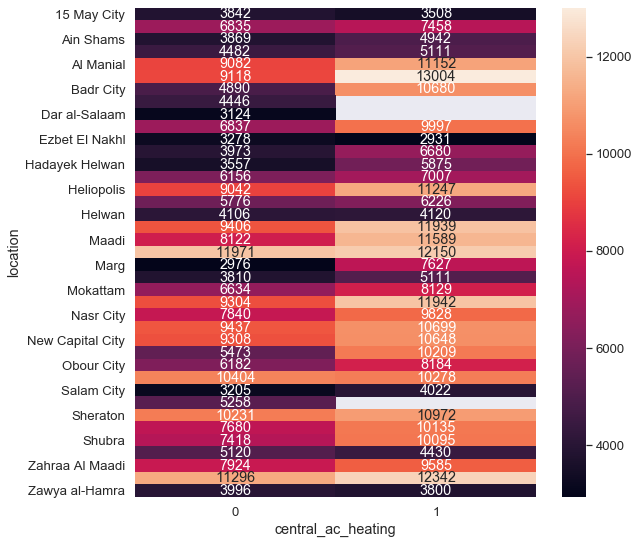

In [237]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [238]:
x=pd.pivot_table(index='location',values='meterprice',columns='built_in_kitchen_appliances',data=df,aggfunc=np.mean)
x

built_in_kitchen_appliances             0             1
location                                               
15 May City                   3837.914894   3940.000000
Abasiya                       6732.594937   7890.000000
Ain Shams                     3862.924833   4249.223881
Al Amiriyyah                  4497.632353   4683.000000
Al Manial                     8950.885714  10381.400000
Almazah                       9304.318182  12354.769231
Badr City                     4913.396096   7820.333333
Basateen                      4223.209302   7642.000000
Dar al-Salaam                 3125.020408   3035.333333
Downtown Cairo                7041.979310   7948.819672
Ezbet El Nakhl                3265.702128   3514.250000
Gesr Al Suez                  3912.366713   5854.115044
Hadayek Helwan                3547.631268   4685.714286
Hadayek al-Kobba              6103.476190   6941.648649
Heliopolis                    8962.900501  11482.610619
Helmeyat El Zaytoun           5713.415751   6429.153846
Helwan                        4108.467822   4054.225000
Katameya                      9603.052747  10369.780488
Maadi                         8492.641115  10029.233010
Madinaty                     11886.948783  13158.602113
Marg                          2988.025496   7651.300000
Matareya                      3846.960265   3593.090909
Mokattam                      6751.224282   7273.724138
Mostakbal City                9667.701783  11068.541353
Nasr City                     8001.909729   8871.508475
New Cairo - El Tagamoa        9453.070861  11038.942116
New Capital City              9488.103448  10428.909091
New Nozha                     5396.515152   7637.740741
Obour City                    6278.462236   6974.666667
Rehab City                   10200.220074  11543.329268
Salam City                    3202.294964   3709.916667
Sayeda Zeinab                 5238.306818   5602.600000
Sheraton                     10190.815190  10824.097222
Shorouk City                  7730.187123  10280.987654
Shubra                        7423.737981   8256.729167
Waili                         5061.347368   5723.714286
Zahraa Al Maadi               7933.615385   9202.484472
Zamalek                      11073.710526  12995.857143
Zawya al-Hamra                3956.409722   4908.500000

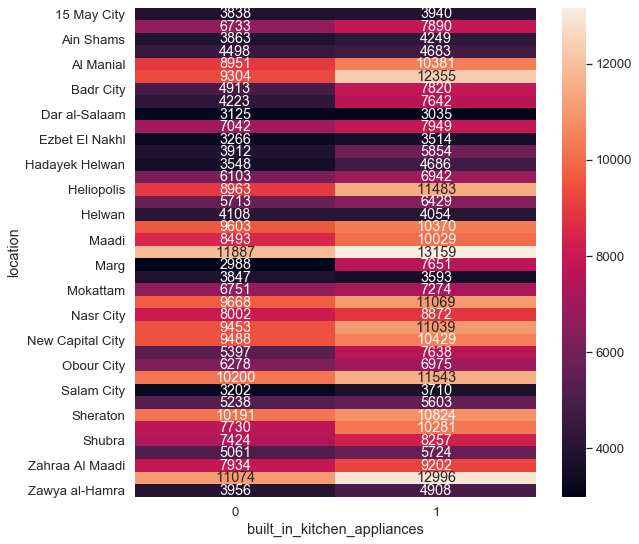

In [239]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [240]:
x=pd.pivot_table(index='location',values='meterprice',columns='month',data=df,aggfunc=np.mean)
x

month                             1             2             3   \
location                                                           
15 May City              3699.950000   3890.859155   4056.000000   
Abasiya                  7153.166667   6802.542857   6225.000000   
Ain Shams                3901.482759   3766.099502   3866.921875   
Al Amiriyyah             3715.375000   4441.200000   4819.000000   
Al Manial               11683.500000   8073.555556   8125.000000   
Almazah                 12154.714286  11209.214286   9247.500000   
Badr City                4616.504587   4729.065858   4865.750000   
Basateen                 4347.500000   3253.500000   3866.000000   
Dar al-Salaam            3023.964286   3114.527778   2921.444444   
Downtown Cairo           6625.630137   7044.996032   7594.783784   
Ezbet El Nakhl           3384.722222   3398.971831   3128.692308   
Gesr Al Suez             3812.595506   4194.880952   4062.855263   
Hadayek Helwan           3789.378378   3487.741667   3358.750000   
Hadayek al-Kobba         5739.605263   6281.729927   6310.600000   
Heliopolis               9710.611940   9183.994585   9255.500000   
Helmeyat El Zaytoun      5312.333333   5823.737288   5312.413793   
Helwan                   4464.000000   4055.210702   3812.234043   
Katameya                 9908.550000   9838.805369   9626.593750   
Maadi                    9394.052632   8749.472803   8307.634146   
Madinaty                10987.314563  11606.549401  12384.229572   
Marg                     2864.900000   3158.803279   3231.636364   
Matareya                 3793.000000   3688.446154   4013.666667   
Mokattam                 6670.404110   6883.962871   6774.884615   
Mostakbal City           9439.848101   9366.369748  11707.183673   
Nasr City                7998.495575   7806.136111   8266.430000   
New Cairo - El Tagamoa   9612.665734   9557.751087   9601.802540   
New Capital City         9342.855670  10126.627178  10947.562500   
New Nozha                6075.909091   5670.375000   6011.400000   
Obour City               6711.244444   6349.790210   6372.000000   
Rehab City              10203.326087  10928.491954  10048.552632   
Salam City               3206.020408   3169.839416   3526.705882   
Sayeda Zeinab            5223.000000   5342.866667   5949.000000   
Sheraton                 9558.583333  10287.639535  10733.000000   
Shorouk City             7844.600000   8479.063725   8164.238095   
Shubra                   7993.593220   7464.144828   6923.131579   
Waili                    5554.857143   5234.825000   4107.500000   
Zahraa Al Maadi          8499.871560   8006.574603   8254.451613   
Zamalek                 14069.222222  10072.375000  14167.142857   
Zawya al-Hamra           3715.500000   3850.240000   3825.750000   

month                             4        5      6       7       8        9   \
location                                                                        
15 May City              3795.430233      NaN    NaN     NaN     NaN      NaN   
Abasiya                  6962.309524      NaN    NaN     NaN     NaN      NaN   
Ain Shams                3986.606362      NaN    NaN     NaN     NaN   2250.0   
Al Amiriyyah             4707.567568      NaN    NaN     NaN     NaN      NaN   
Al Manial                9792.743590      NaN    NaN     NaN     NaN      NaN   
Almazah                  8428.184211      NaN    NaN     NaN     NaN      NaN   
Badr City                5498.694301      NaN    NaN     NaN  3310.0      NaN   
Basateen                 5248.480000      NaN    NaN     NaN     NaN      NaN   
Dar al-Salaam            3185.897727      NaN    NaN     NaN     NaN      NaN   
Downtown Cairo           7272.894928      NaN    NaN     NaN     NaN      NaN   
Ezbet El Nakhl           3182.351064      NaN    NaN     NaN     NaN      NaN   
Gesr Al Suez             4006.962865      NaN    NaN     NaN  8461.0      NaN   
Hadayek Helwan           3608.552941      NaN  750.0     NaN     NaN      NaN

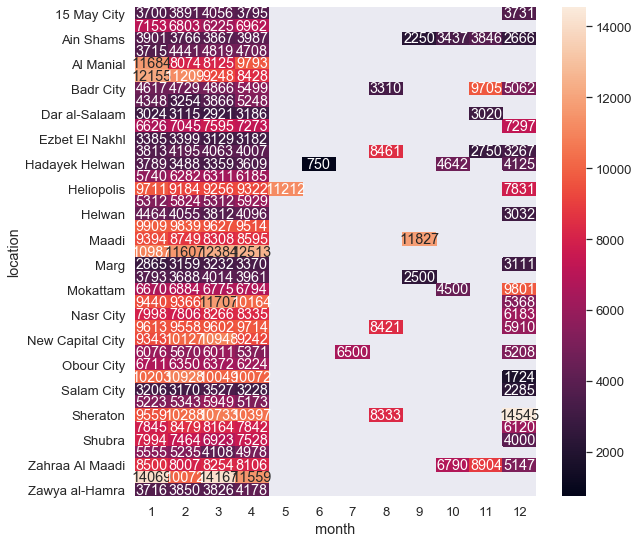

In [241]:
sns.heatmap(x,annot=True,fmt='0.0f')

### elevator plays a rule in the price of high levels in the building but still high levels are lowest value levels


In [243]:
x=pd.pivot_table(index='level',values='meterprice',columns='elevator',data=df,aggfunc=np.mean)
x

elevator            0             1
level                              
1         8082.675049   9325.966149
10        5302.612100   5844.094253
10+       4809.668524   5727.701271
2         8924.234525   9205.846745
3         7673.667658   9626.242029
4         6553.247668   9269.354912
5         6137.433129   9073.076433
6         6001.578723   8320.192908
7         5624.672457   7050.370614
8         5444.772861   6543.321041
9         5670.611446   6282.600457
Ground    9095.266869  10014.439135
Highest   5790.308571   5229.635965

In [242]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')